# Index   

0. [Importing libraries](#-0.-Importing-libraries) 

1. [Exploratory Data Analysis](#-1.-Exploratory-Data-Analysis)

2. [Screening classification models](#2.-)
    
3. [Predictions](#-3.-Predicitons)
 
4. [Results & Conclusions](#-6.-Results-&-Conclusions)

5. [References](#-7.-References)

6. [Other](#-8.-Other)

# 0. Importing libraries

In [1]:
#Data exploration & manipulation
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.style as style 
import datetime as dt
import os
import matplotlib.pyplot as plt
import sweetviz as sv


print('sweetviz: %s' % sv.__version__) # print version

#ML Models search and optimisation
from pycaret.classification import * 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import optuna
print('optuna: %s' % optuna.__version__) # print version
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, RepeatedKFold, GridSearchCV


%matplotlib inline



# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version




# Sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import StratifiedShuffleSplit # to split stratified 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA

# Visualization
import matplotlib.image as mpimg
import plotly.io as pio #To fix an issue with the renderer of graphs in VSC
pio.renderers
import matplotlib 
import matplotlib.pyplot as plt # for showing images
print('matplotlib: %s' % matplotlib.__version__) # print version
import random
import seaborn as sns
sns.set_style('white')
%matplotlib inline


# Other utilities
import sys
import os
from platform import python_version
import datetime
from time import localtime, strftime, gmtime
import pathlib
from glob import glob
from tqdm import tqdm
import math


print('python version: %s' % python_version()) # print version

sweetviz: 2.1.4
optuna: 2.10.0
pandas: 1.3.5
numpy: 1.19.5
sklearn: 0.23.2
matplotlib: 3.5.1
python version: 3.7.12


# 1. Exploratory Data Analysis

In [2]:
# Import initial files from the website

acad_Yield_train = pd.read_csv("https://challenges-asset-files.s3.us-east-2.amazonaws.com/Events/Talent+Squad+League/3rd_batch/data/train.csv", index_col='Unnamed: 0')

acad_Yield_test = pd.read_csv("https://challenges-asset-files.s3.us-east-2.amazonaws.com/Events/Talent+Squad+League/3rd_batch/data/test.csv", index_col='Unnamed: 0')

In [3]:
acad_Yield_test

gender         lunch test preparation course  math score  reading score  \
79     male      standard                    none          54             43   
277  female      standard                    none          72             77   
855  female      standard                    none          87             97   
922    male      standard                    none          55             55   
332    male      standard                    none          56             54   
703    male      standard                    none          71             72   
754  female      standard               completed          94            100   
273  female      standard                    none          93            100   
804    male      standard                    none          74             69   
267  female      standard                    none          67             76   
882  female      standard                    none          60             62   
599  female      standard               completed          77             86   
305  female      standard                    none          54             57   
271  female      standard                    none          59             69   
978    male  free/reduced                    none          51             51   
507  female  free/reduced               completed          45             56   
676    male  free/reduced                    none          63             61   
396  female      standard                    none          85            100   
611  female      standard               completed          63             81   
258  female  free/reduced                    none          64             79   
915  female  free/reduced                    none          64             70   
597  female      standard                    none          46             51   
583    male      standard                    none          80             79   
257  female      standard                    none          69             71   
933    male  free/reduced                    none          54             66   
562  female      standard                    none          57             66   
328    male  free/reduced               completed          58             60   
727    male      standard                    none          75             68   
174    male      standard               completed          83             74   
779    male  free/reduced                    none          38             51   
263    male      standard                    none          61             66   
474  female      standard                    none          65             71   
280    male      standard                    none          85             81   
347    male      standard                    none          74             78   
679    male      standard                    none          74             61   
832  female  free/reduced                    none          13             36   
895  female      standard                    none          71             88   
616  female      standard               completed          75             93   
775  female  free/reduced                    none          28             38   
571  female      standard               completed          81             91   
262    male      standard                    none          64             56   
23   female  free/reduced                    none          44             55   
372  female  free/reduced               completed          56             65   
364    male      standard                    none          72             71   
877    male  free/reduced               completed          75             65   
925    male  free/reduced               completed          64             62   
487  female      standard                    none          57             56   
861  female      standard                    none          86             84   
188    male      standard                    none          73             65   
147  

In [4]:
acad_Yield_train.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Let's do a fast exploration of train and test dataset with the library sweetviz.m

In [5]:
feature_config = sv.FeatureConfig(force_num=["math score", "reading score", "writing score", "parental level of education"], force_cat=["gender", "lunch", "test preparation course"])

In [6]:
#analyzing the training dataset

acad_Yield_train_report = sv.analyze(acad_Yield_train, target_feat = 'parental level of education', feat_cfg=feature_config) 

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



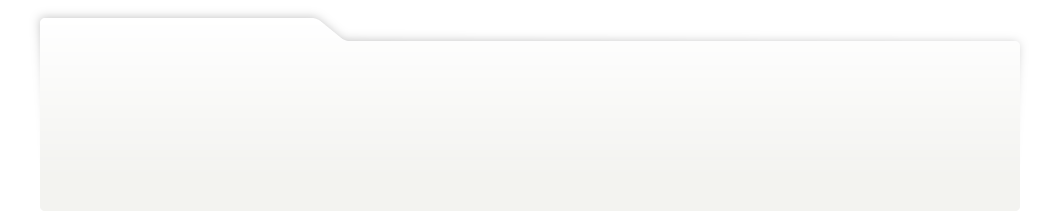
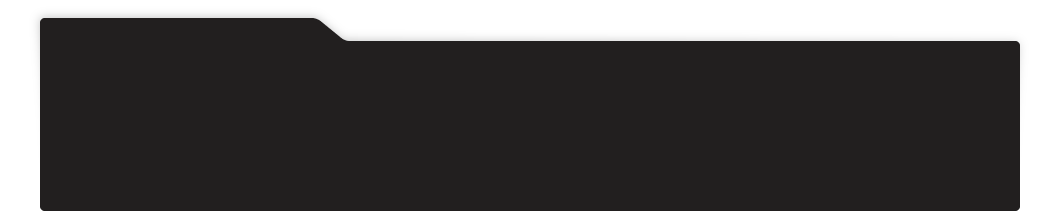
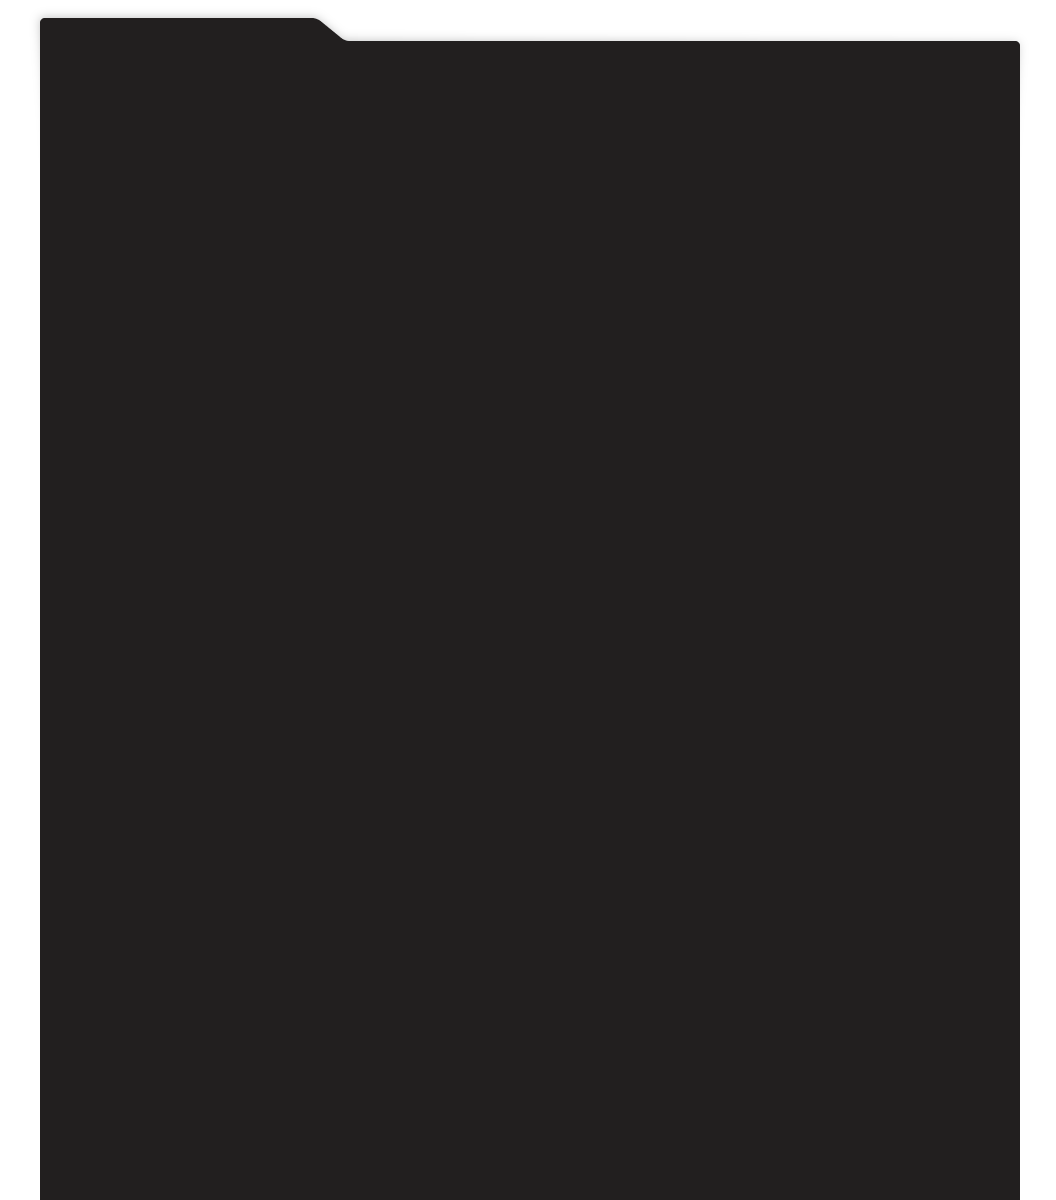
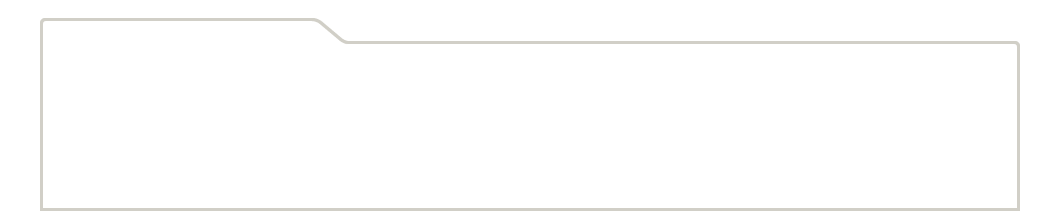
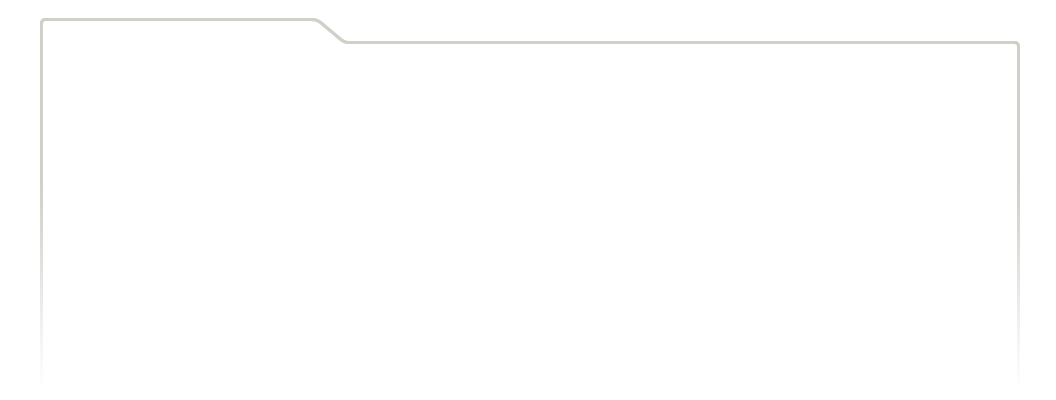
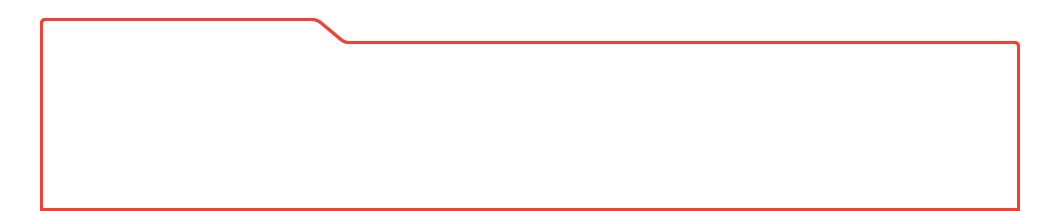
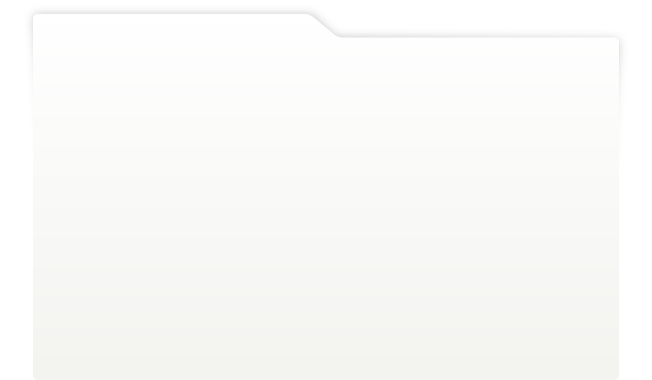
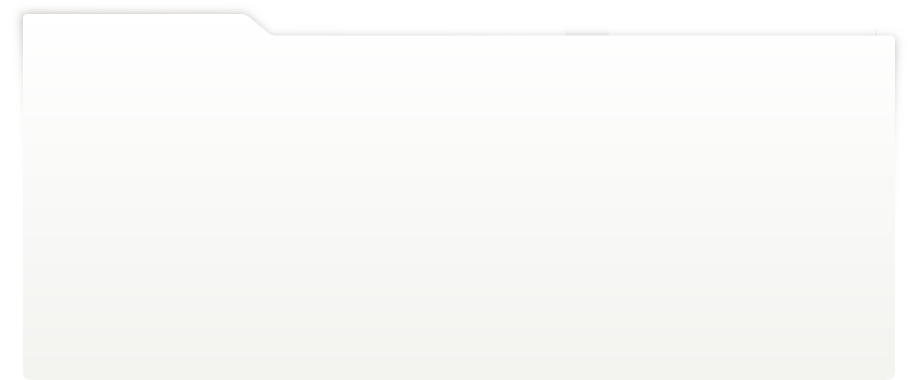
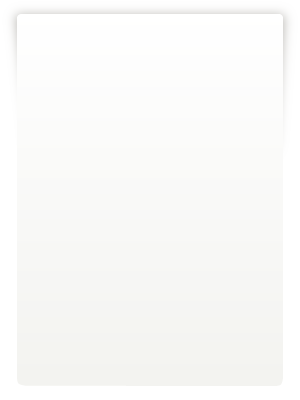
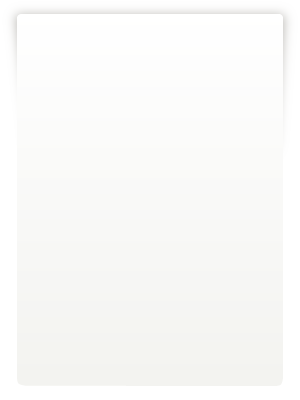
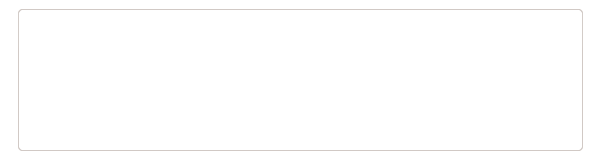
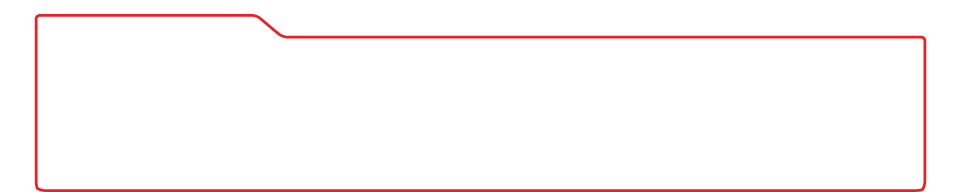
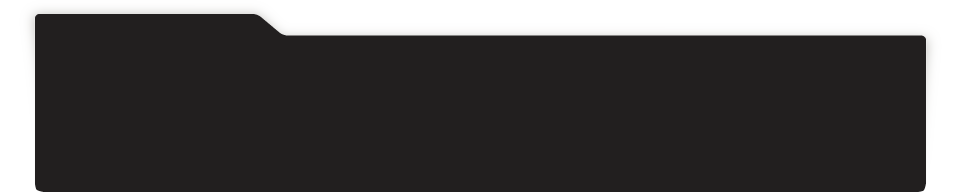
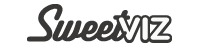
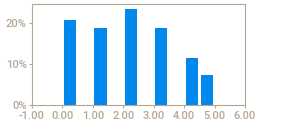
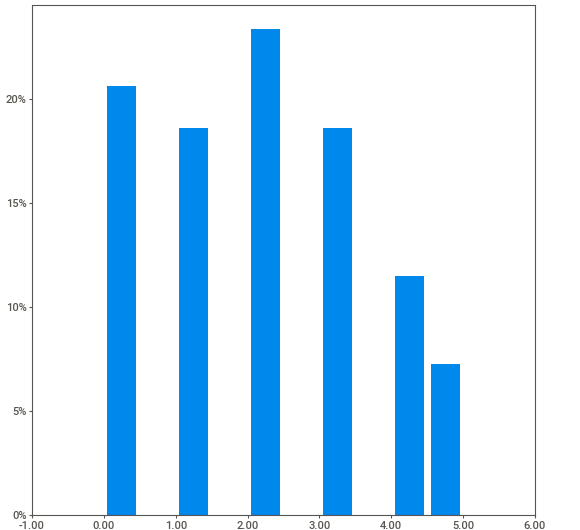
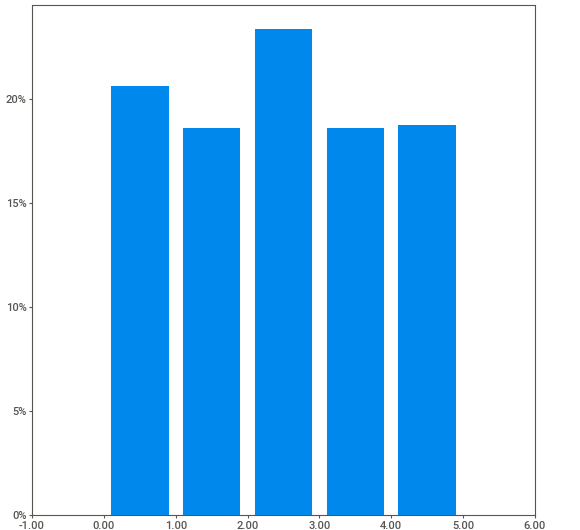
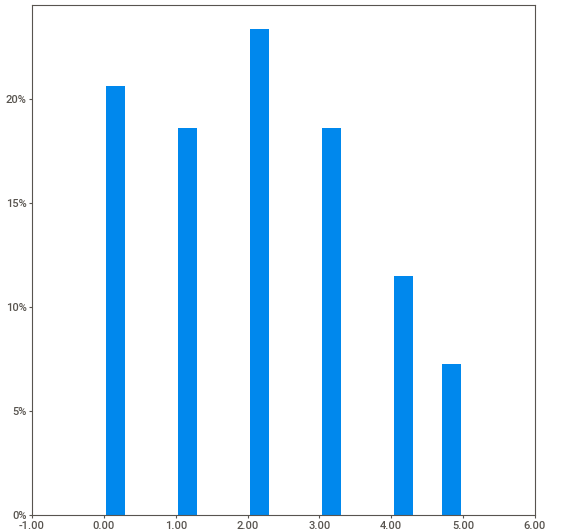
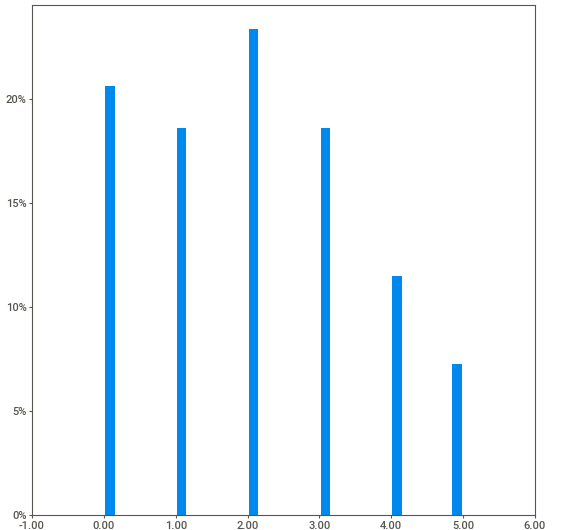
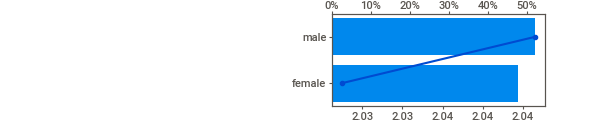
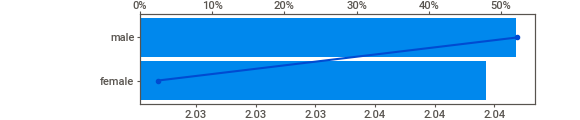
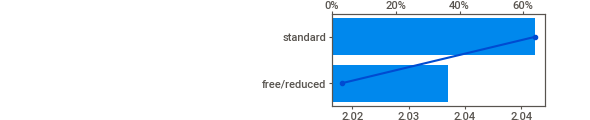
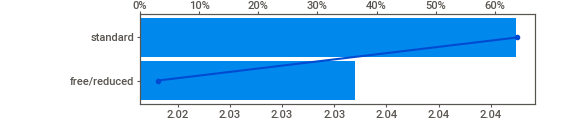
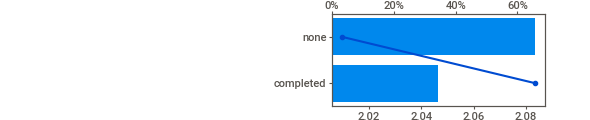
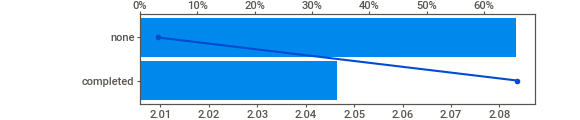
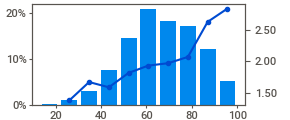
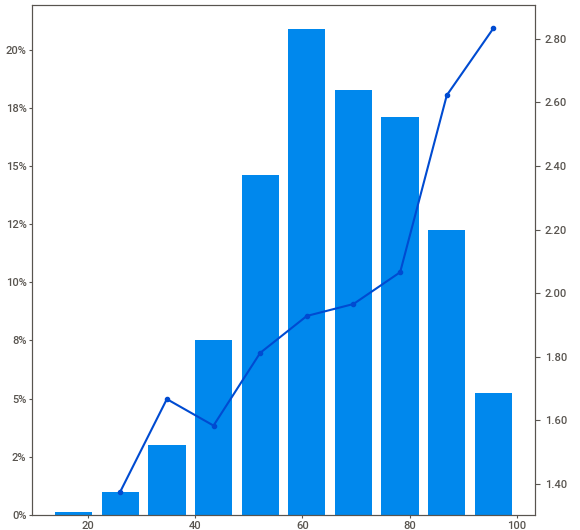
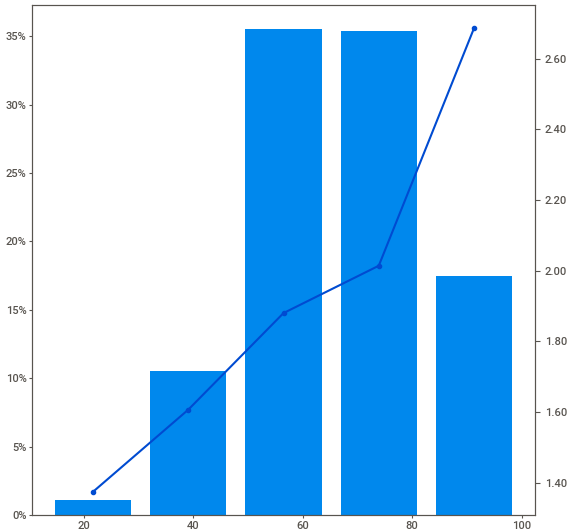
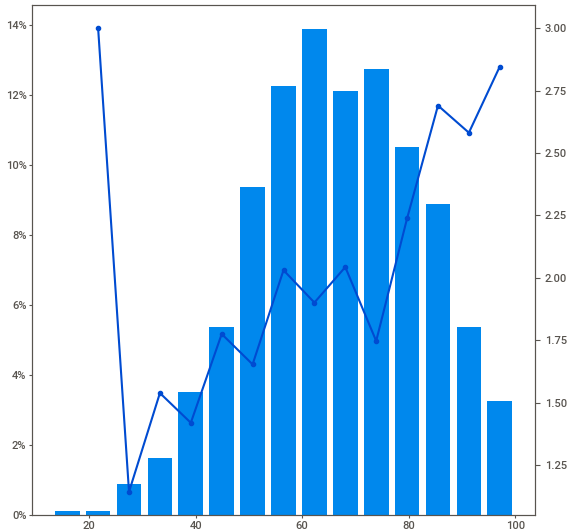
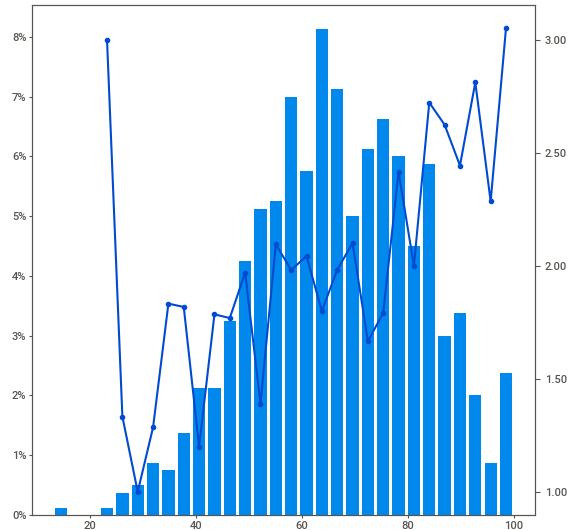
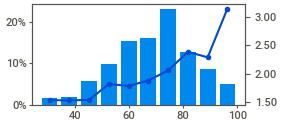
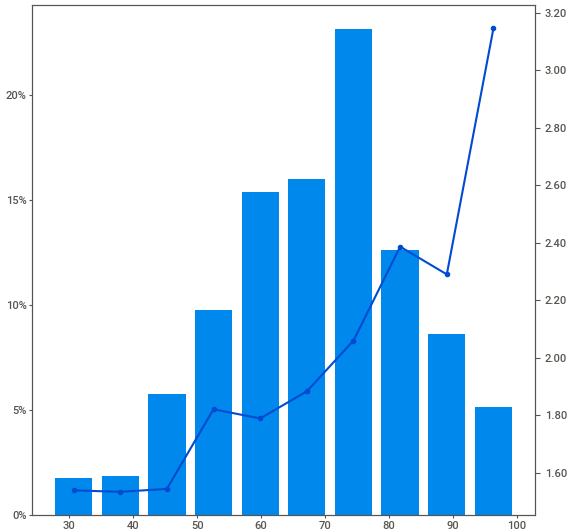
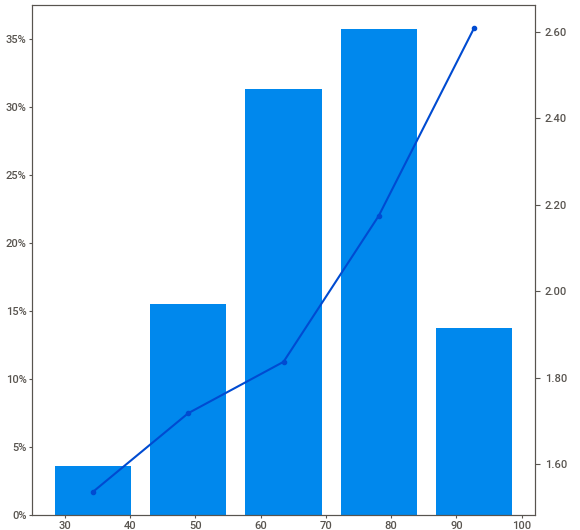
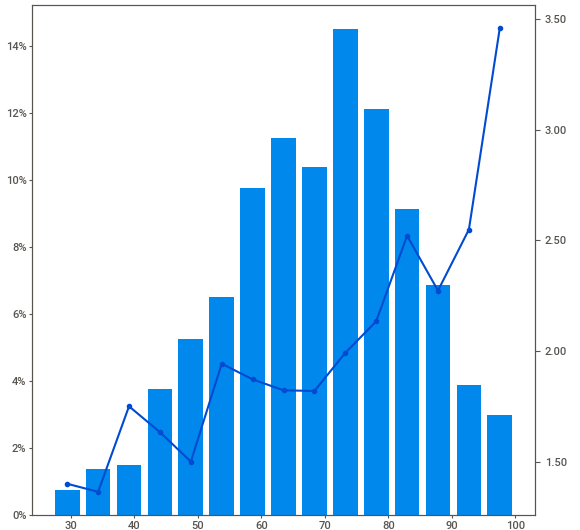
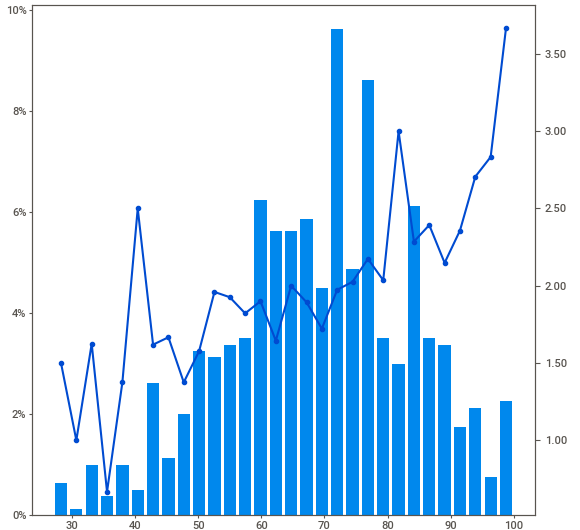
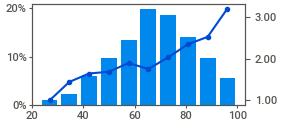
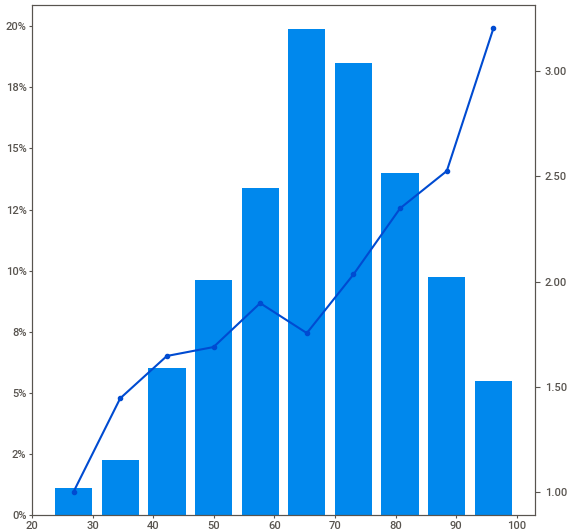
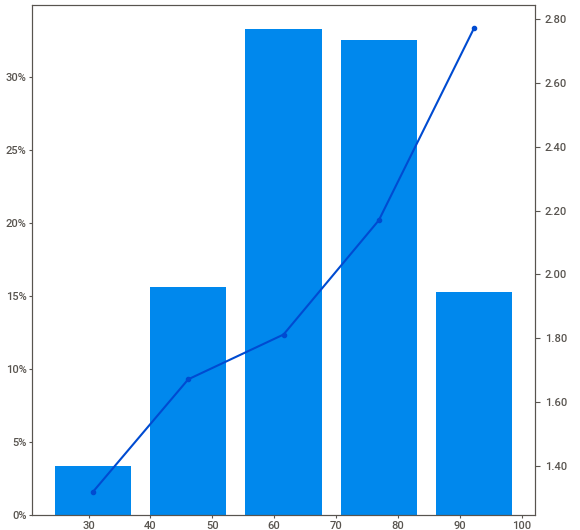
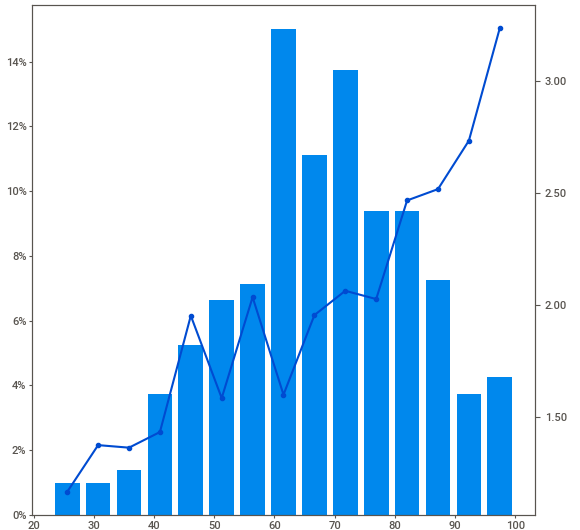
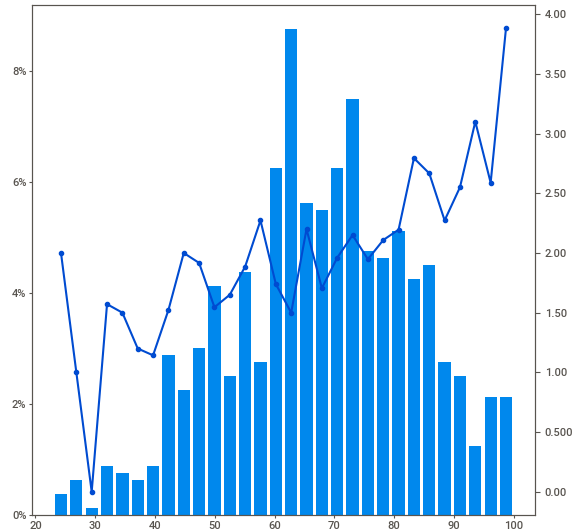
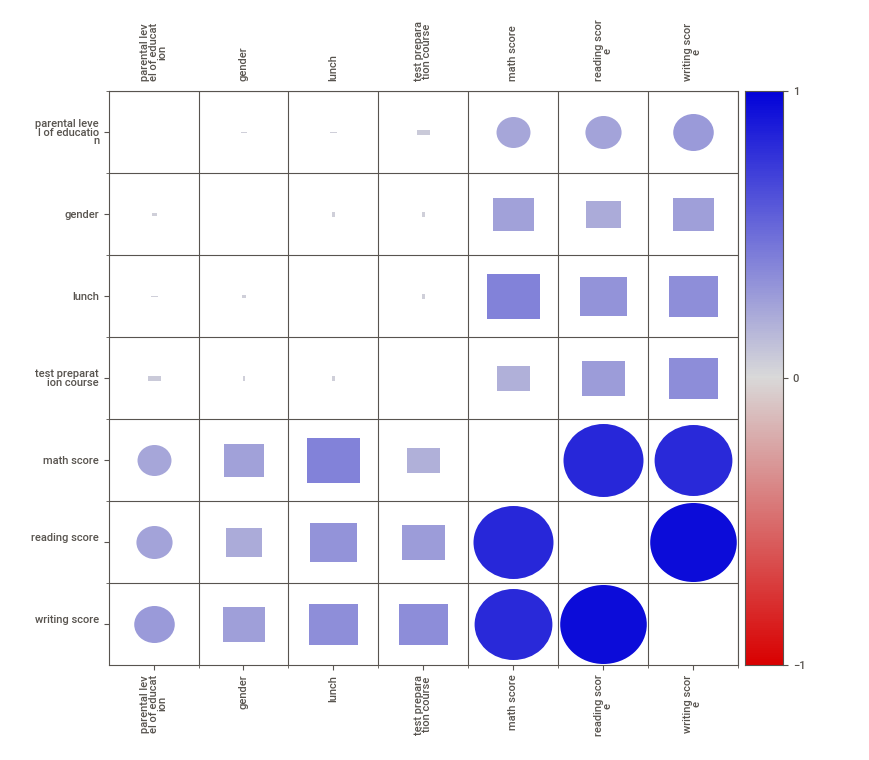
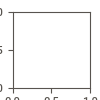

Report 'C:\Users\march\000 Treball Ju`yter 000\Hackathons\\-Hackathon_Talent_Squad_III_DS\train_EDA.html' was saved to storage.


In [7]:
#display the train report
acad_Yield_train_report.show_notebook( w=None, 
                                        h=None, 
                                        scale=None,
                                        layout='vertical',
                                        filepath='C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\\-Hackathon_Talent_Squad_III_DS\\train_EDA.html')


In [8]:
comparison_report = sv.compare([acad_Yield_train, "Training Data"], [acad_Yield_test, "Test Data"], "parental level of education", feature_config)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)



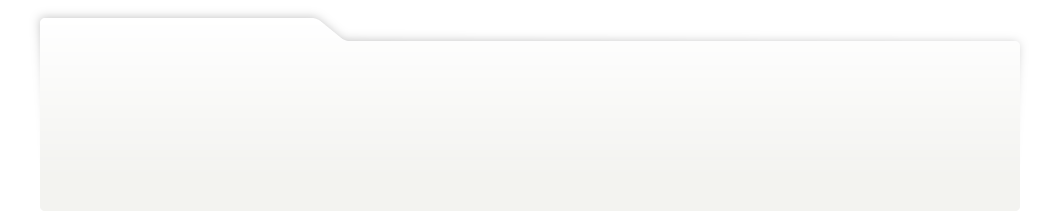
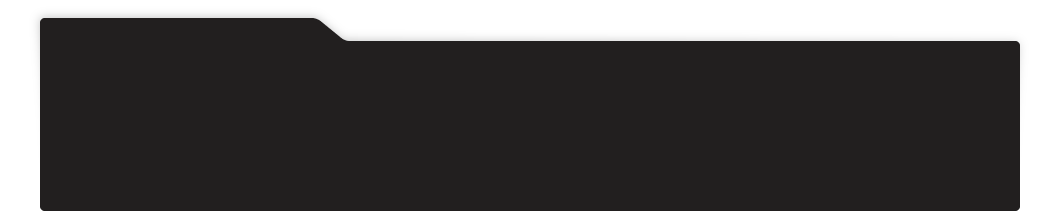
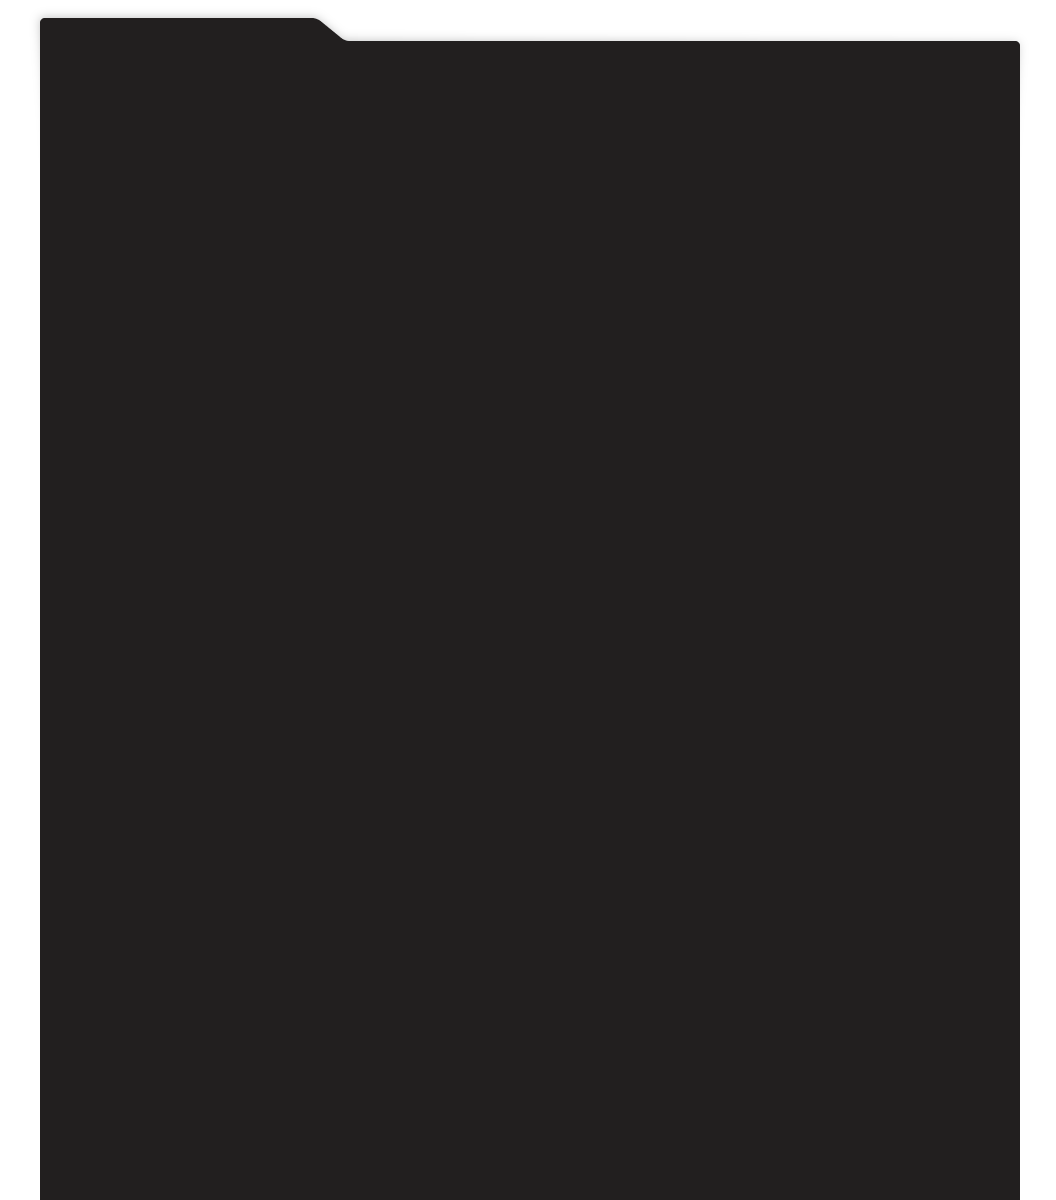
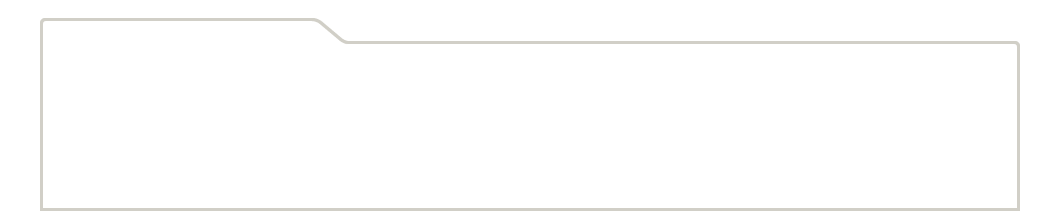
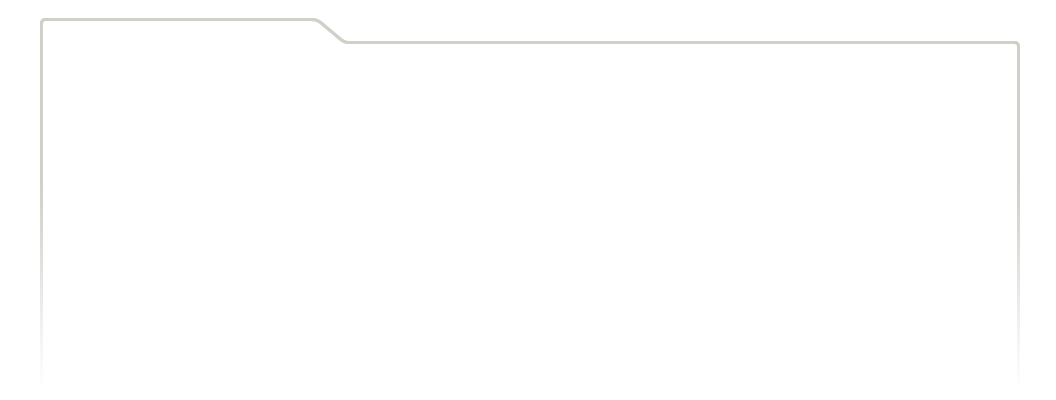
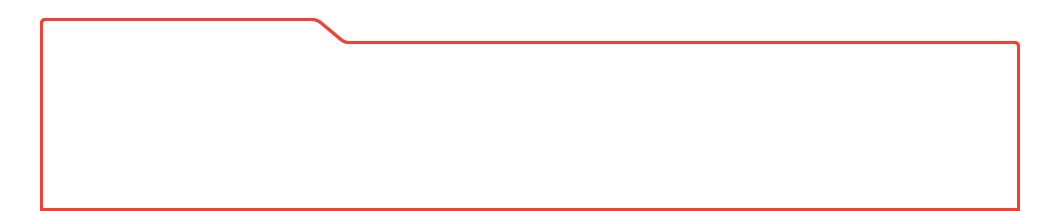
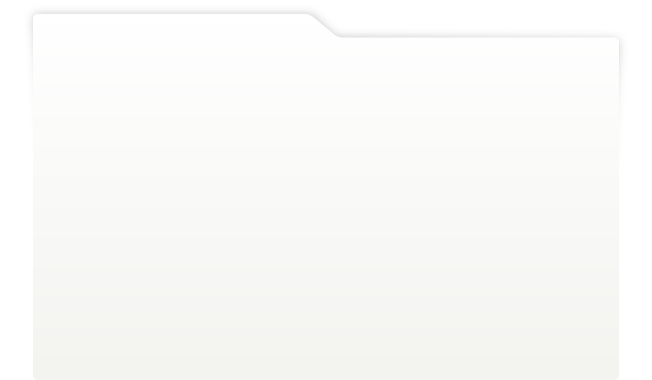
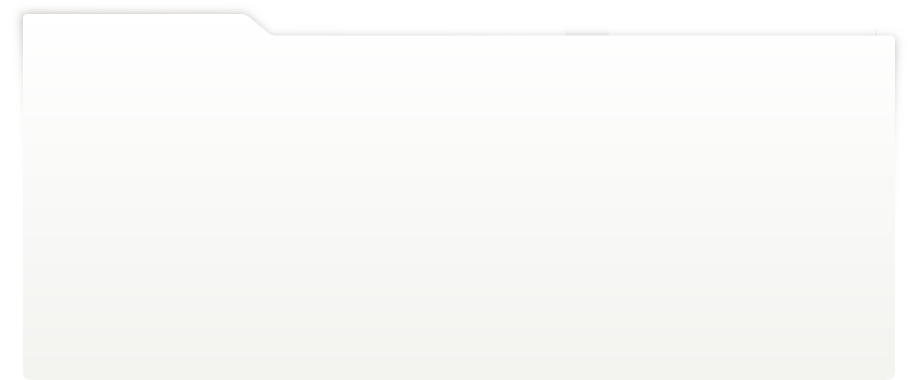
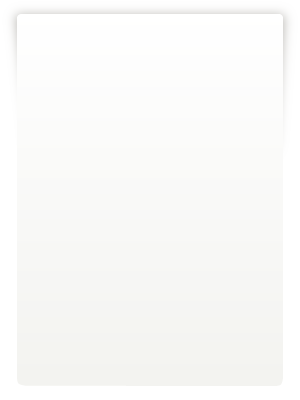
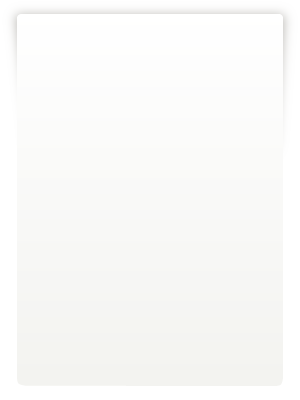
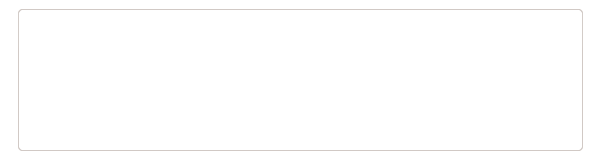
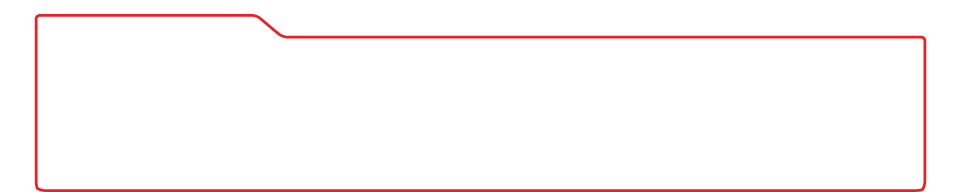
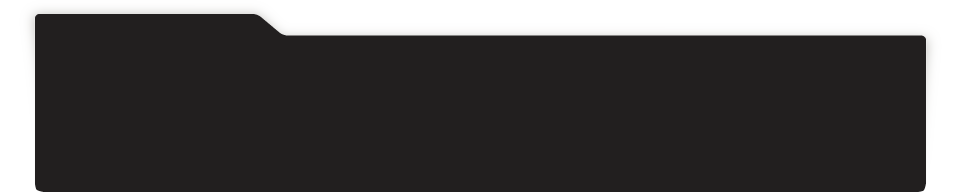
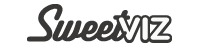
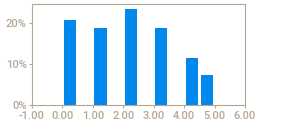
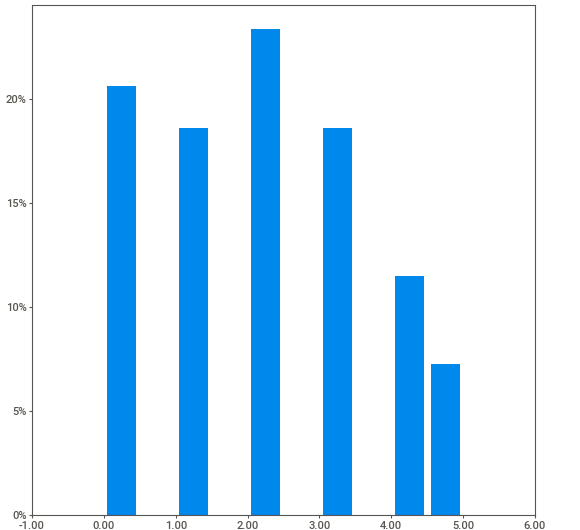
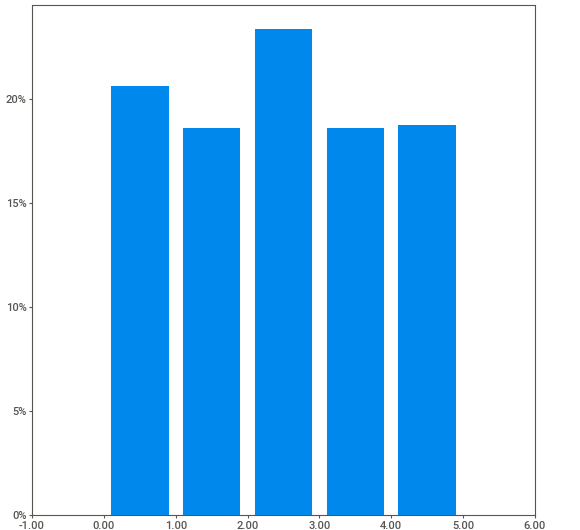
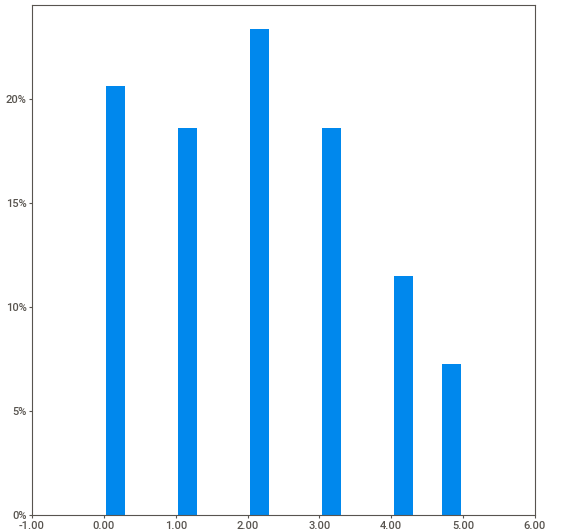
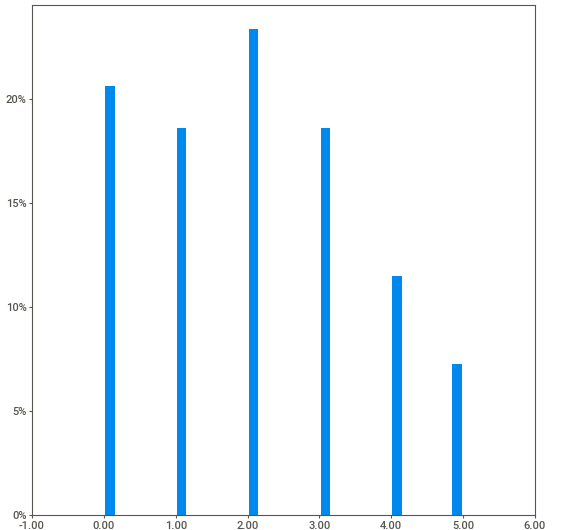
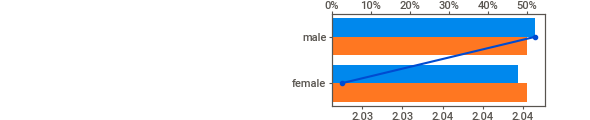
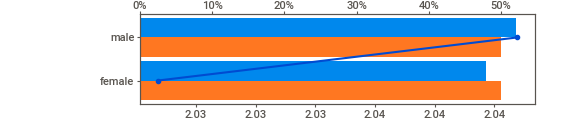
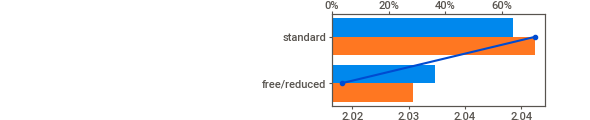
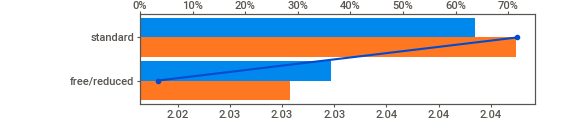
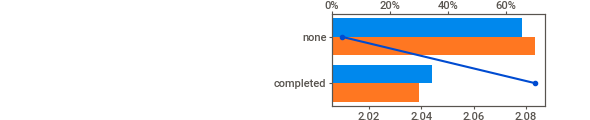
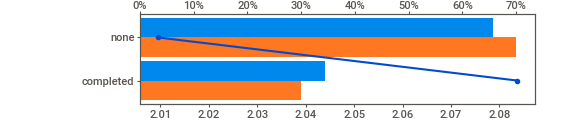
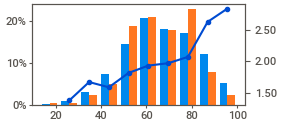
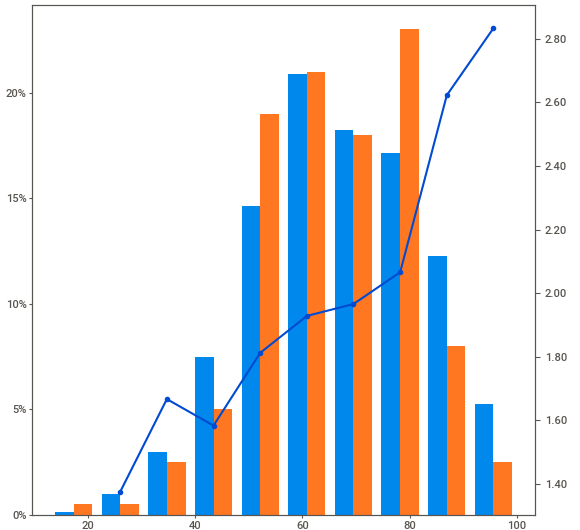
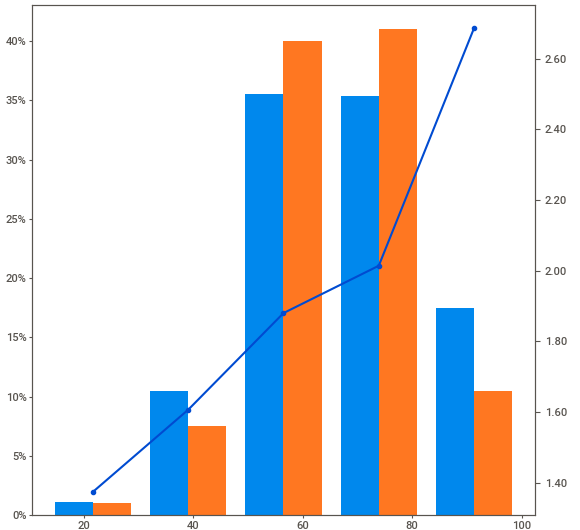
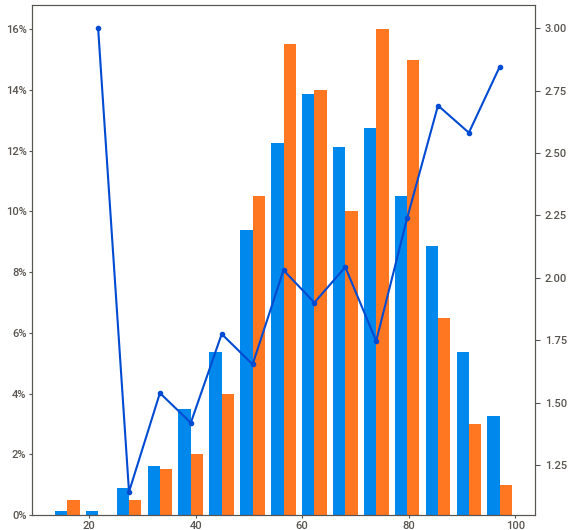
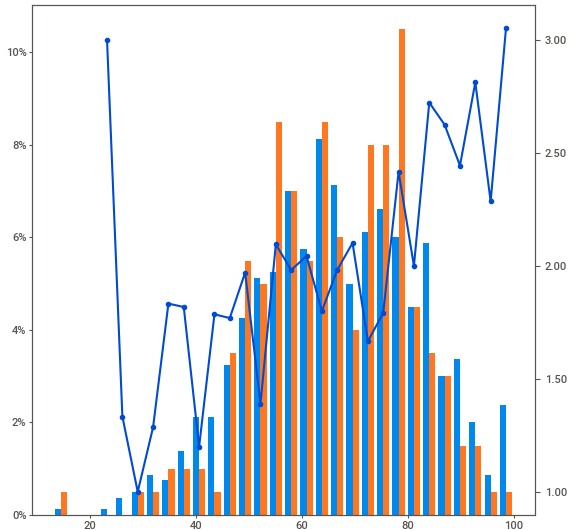
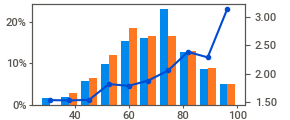
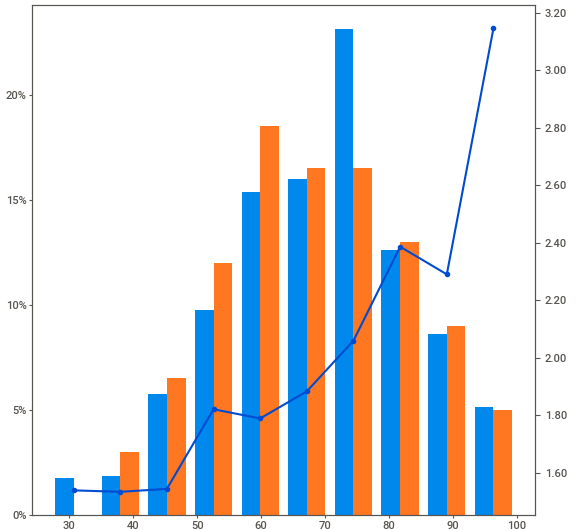
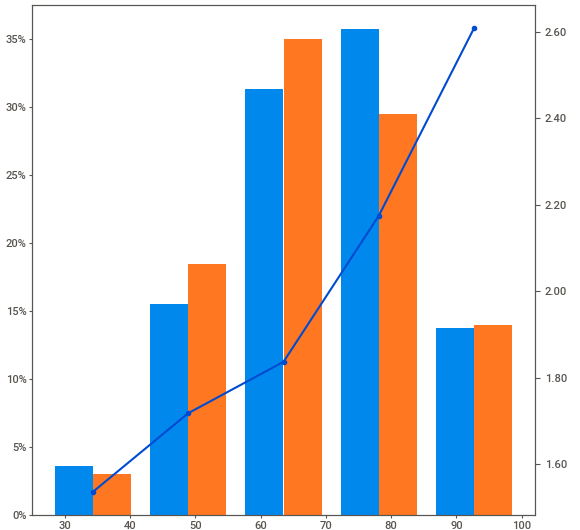
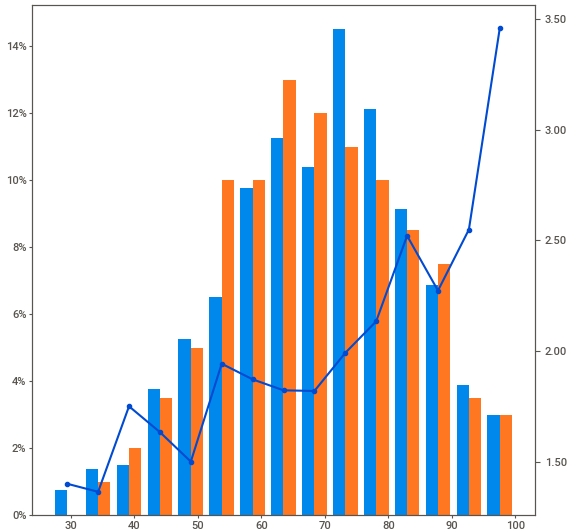
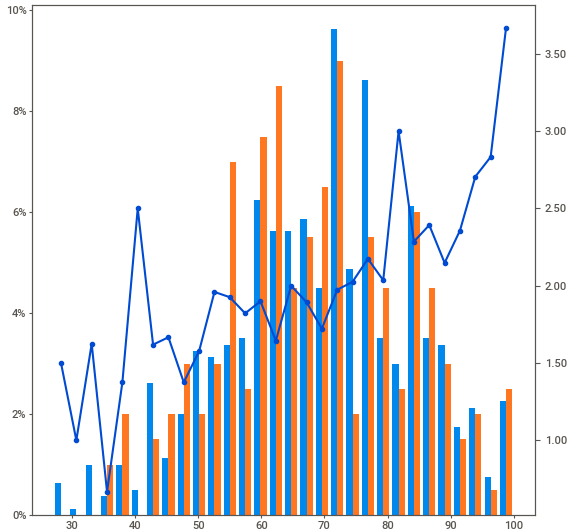
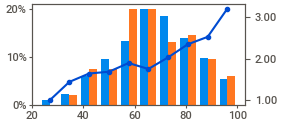
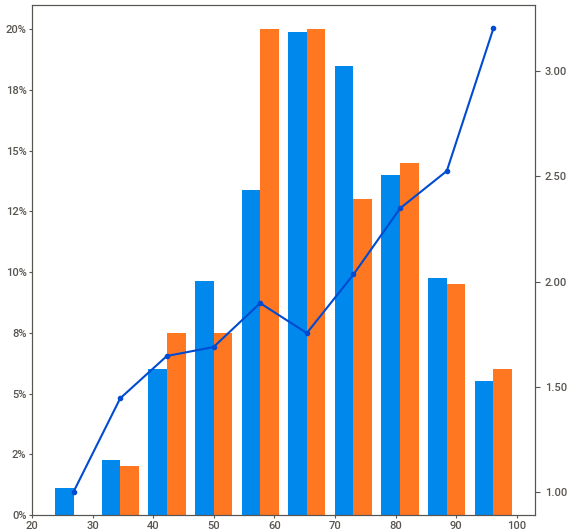
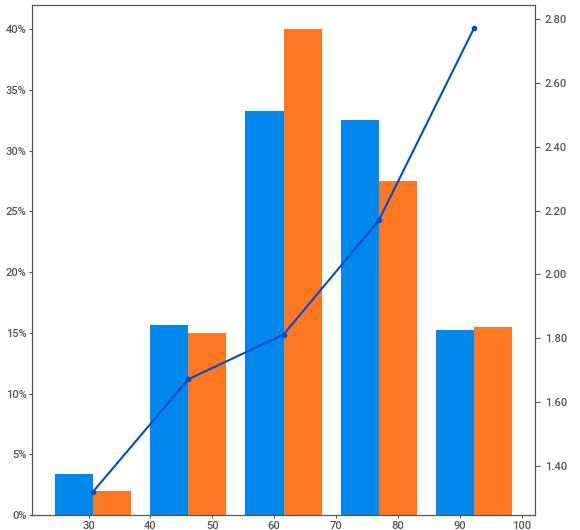
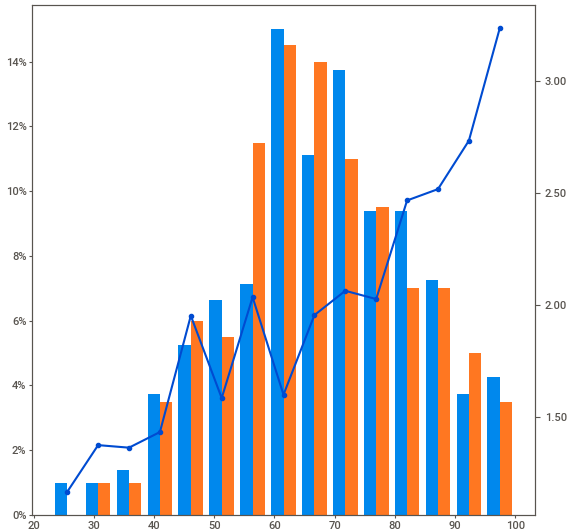
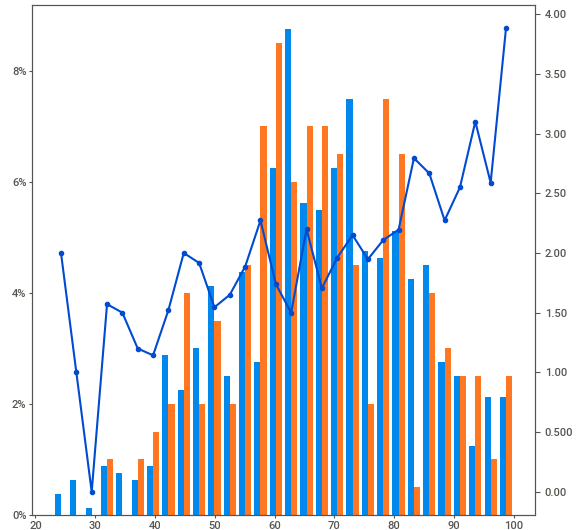
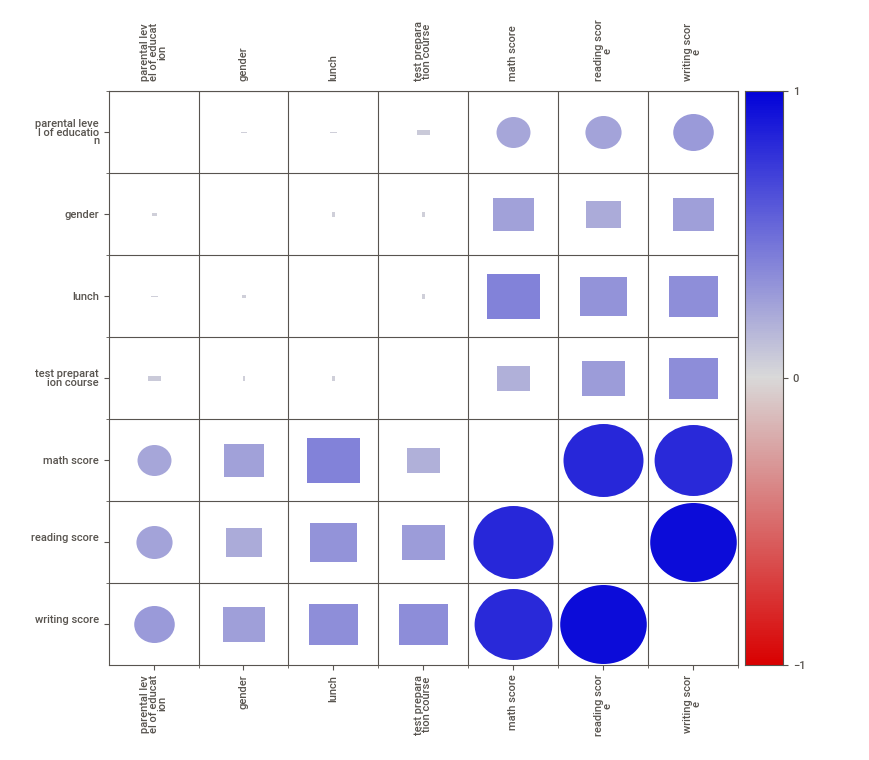
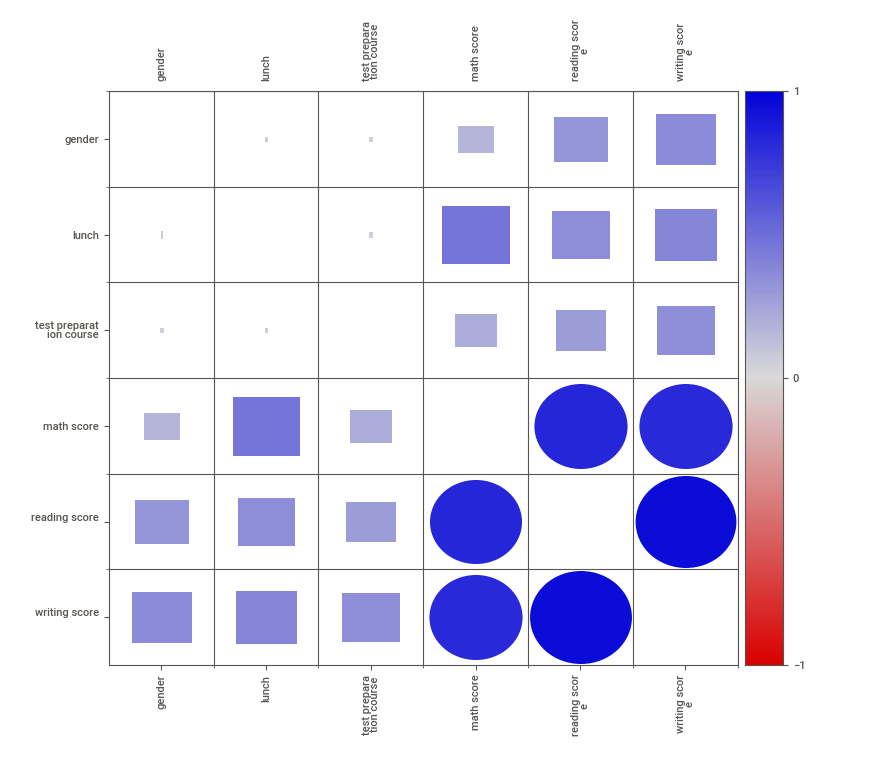

Report 'C:\Users\march\000 Treball Ju`yter 000\Hackathons\\-Hackathon_Talent_Squad_III_DS\test_vs_train_EDA.html' was saved to storage.


In [9]:
#display the train report
comparison_report.show_notebook( w=None, 
                                h=None, 
                                scale=None,
                                layout='vertical',
                                filepath='C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\\-Hackathon_Talent_Squad_III_DS\\test_vs_train_EDA.html')

## Gender

In [10]:
df = acad_Yield_train

df_sex_ple = pd.crosstab(df['parental level of education'], df['gender'], margins=True)
#df_sex_ple['log_female' ]= [math.log(x) for x in df_sex_ple.female]
#df_sex_ple['log_male'] = [math.log(x) for x in df_sex_ple.male]

df_sex_ple


gender                       female  male  All
parental level of education                   
0                                77    88  165
1                                84    65  149
2                                82   105  187
3                                64    85  149
4                                43    49   92
5                                33    25   58
All                             383   417  800

In [11]:
labels  = [ 'Education level ' + str(x) for x in list(df_sex_ple.index[:6])]

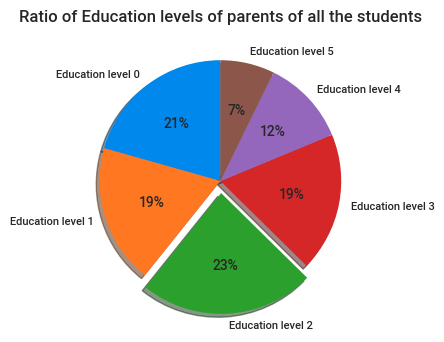

In [12]:

plt.pie(data=df_sex_ple[:6], x= 'All', labels = labels, explode=(0,0,0.1,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)
plt.title('Ratio of Education levels of parents of all the students')
plt.show()

The education level most populated is level 2 with a population of 23%. Predictions accuracy lower than 23% performs worse than allways predicting majority label. 

In [13]:
df_sex_ple = df_sex_ple.reset_index()
df_sex_ple

gender parental level of education  female  male  All
0                                0      77    88  165
1                                1      84    65  149
2                                2      82   105  187
3                                3      64    85  149
4                                4      43    49   92
5                                5      33    25   58
6                              All     383   417  800

In [14]:
df_sex_ple.columns

Index(['parental level of education', 'female', 'male', 'All'], dtype='object', name='gender')

In [15]:
df_sex_ple.drop(6, axis=0, inplace=True)
df_sex_ple.drop('All', axis=1, inplace=True)


In [16]:

df_sex_ple['female_score'] =df_sex_ple['parental level of education']*df_sex_ple['female']

In [17]:

df_sex_ple['male_score'] =df_sex_ple['parental level of education']*df_sex_ple['male']
df_sex_ple

gender parental level of education  female  male female_score male_score
0                                0      77    88            0          0
1                                1      84    65           84         65
2                                2      82   105          164        210
3                                3      64    85          192        255
4                                4      43    49          172        196
5                                5      33    25          165        125

In [18]:
df_sex_ple.male_score.sum()/df_sex_ple.male.sum()

2.0407673860911273

In [19]:
df_sex_ple.female_score.sum()/df_sex_ple.female.sum()

2.028720626631854

No significance difference between male and female students.

In [20]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})
plt.style.use('Solarize_Light2')

In [21]:
sns.set_style('white')

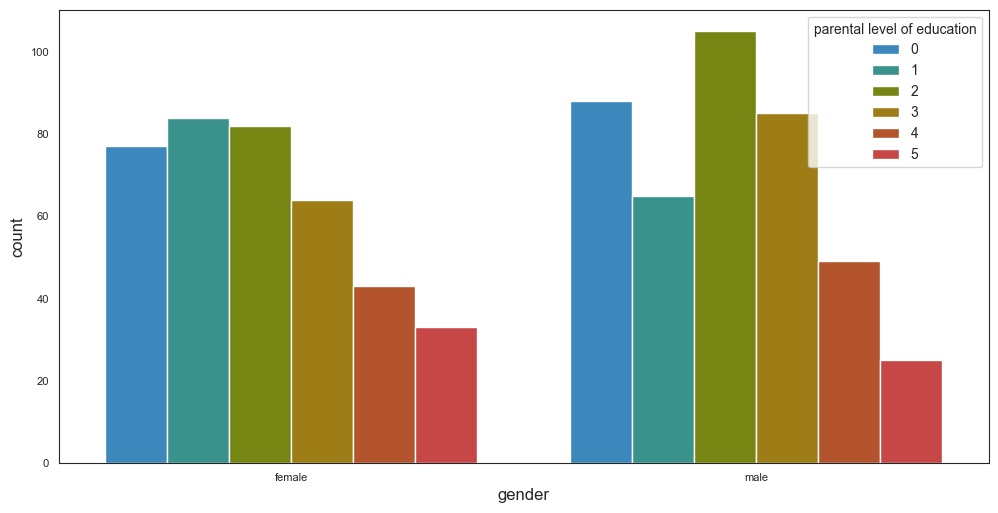

In [22]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(x='gender', hue='parental level of education', data=df);
plt.show()

Text(0.5, 1.0, 'count')

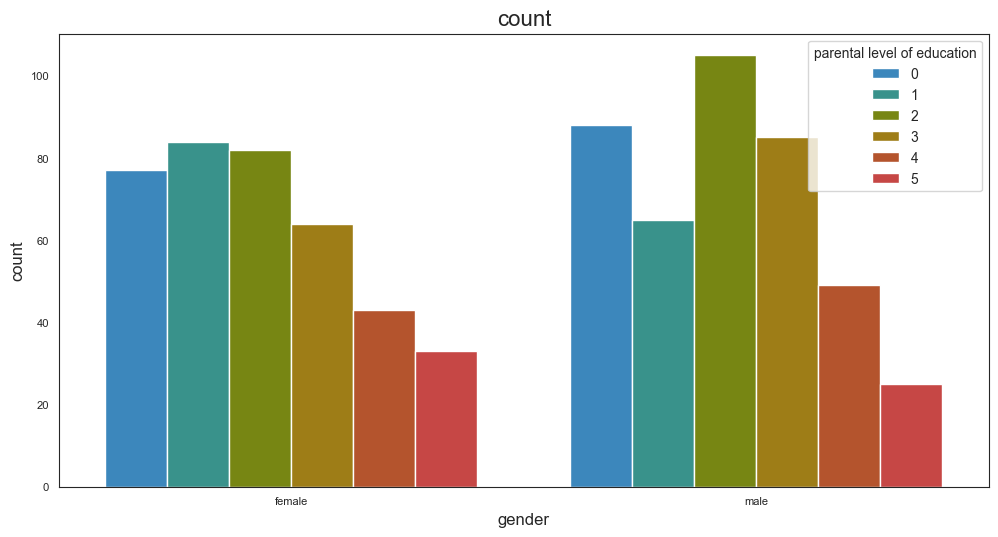

In [23]:

plt.rcParams['figure.figsize'] = (12, 6)
plt.tight_layout ()
a = sns.countplot(x='gender', hue='parental level of education', data=df)
a.set_title('count')
#a.set_title ('genre')

## Lunch

In [24]:
pd.crosstab(df['parental level of education'], df['lunch'], margins=True)

lunch                        free/reduced  standard  All
parental level of education                             
0                                      58       107  165
1                                      53        96  149
2                                      75       112  187
3                                      56        93  149
4                                      27        65   92
5                                      22        36   58
All                                   291       509  800

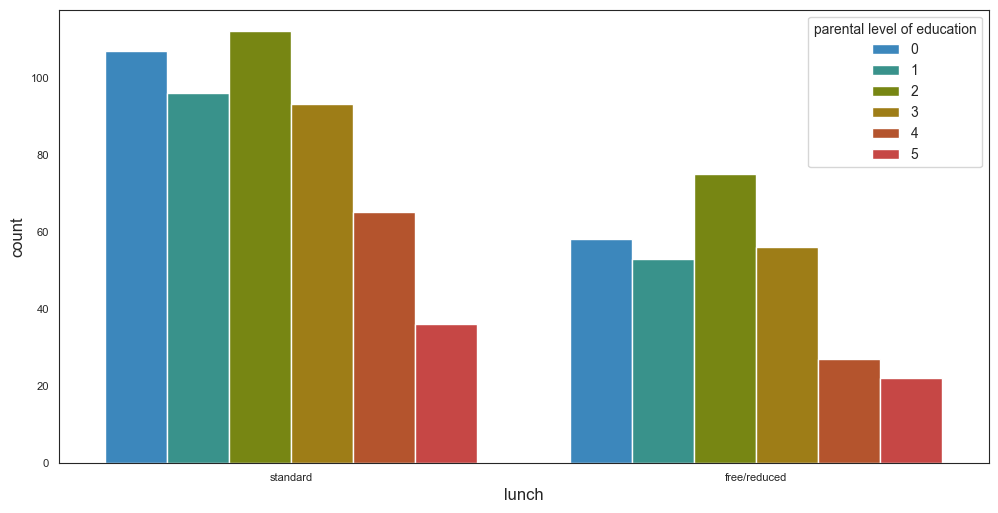

In [25]:

plt.rcParams['figure.figsize'] = (12, 6)
plt.tight_layout ()
a = sns.countplot(x='lunch', hue='parental level of education', data=df)
#a.set_title ('genre')

## Test preparation course

In [26]:
pd.crosstab(df['parental level of education'], df['test preparation course'], margins=True)

test preparation course      completed  none  All
parental level of education                      
0                                   47   118  165
1                                   51    98  149
2                                   71   116  187
3                                   59    90  149
4                                   32    60   92
5                                   15    43   58
All                                275   525  800

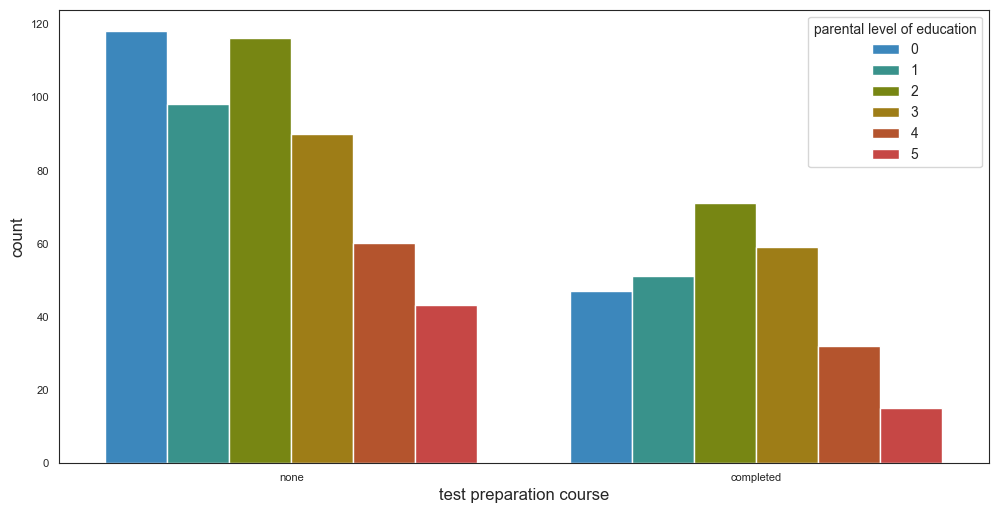

In [27]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.tight_layout ()
a = sns.countplot(x='test preparation course', hue='parental level of education', data=df)

In [28]:
df = acad_Yield_train
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Text(0.5, 0.98, 'Pair plot of score with parental level of education differentiation')

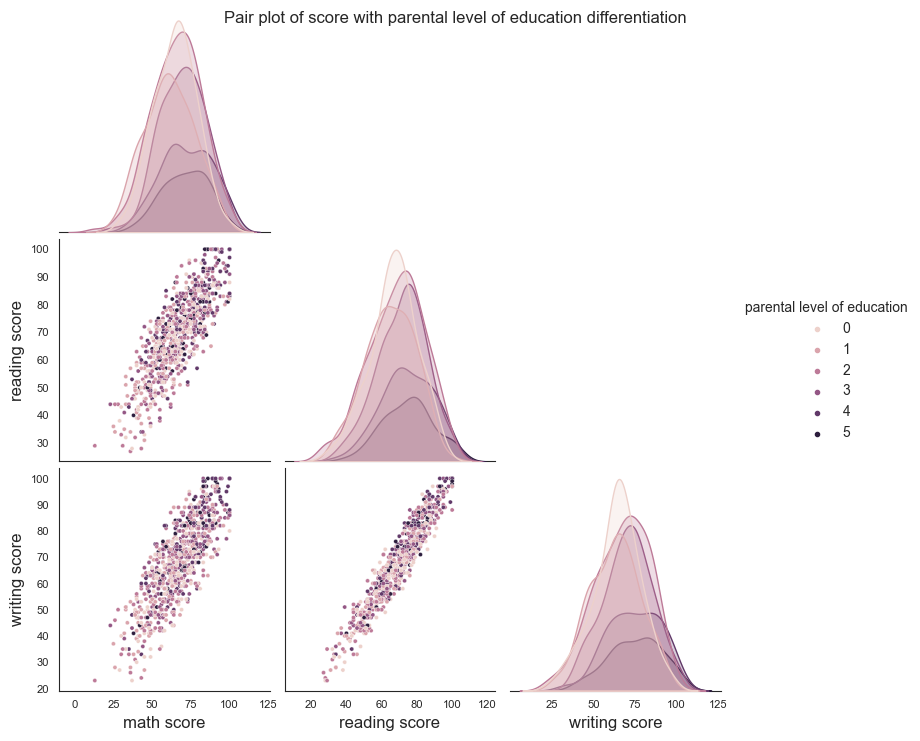

In [29]:
pairplot_education = sns.pairplot(df, corner=True,hue='parental level of education')
pairplot_education.fig.suptitle('Pair plot of score with parental level of education differentiation')

## Boxplot segmentation study

Let's check distribution of the segmented population according performance on the different scoring subjects. The 8 combination 

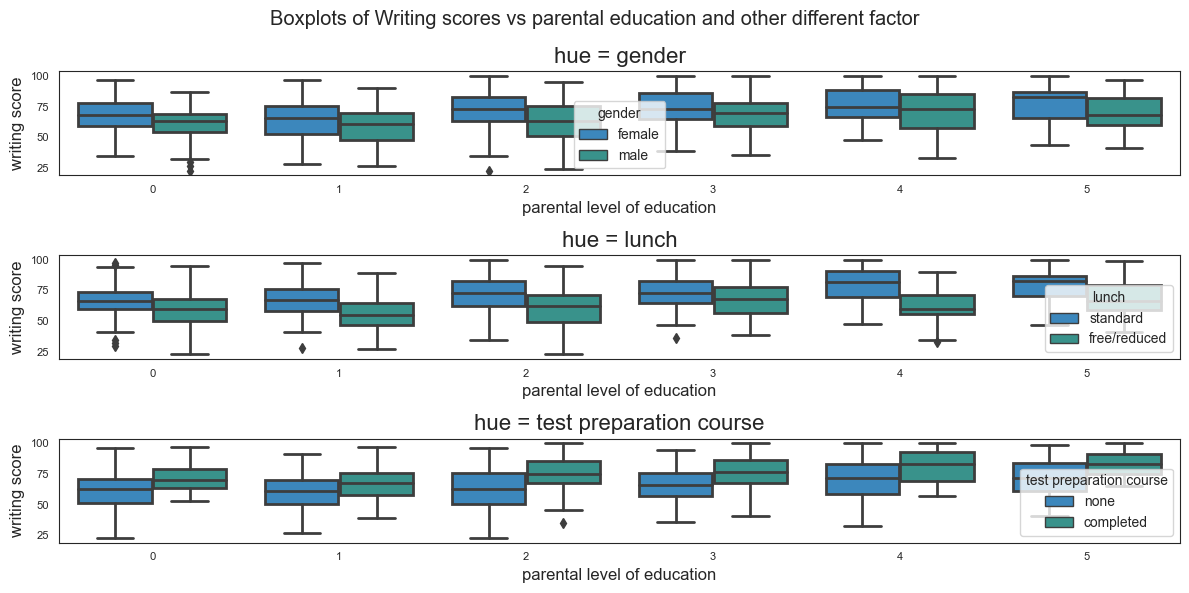

In [30]:
list_hues = ['gender', 'lunch', 'test preparation course']


fig, axs = plt.subplots(nrows=3)
my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}
i=0
fig.suptitle('Boxplots of Writing scores vs parental education and other different factor' , fontsize="x-large")
fig.set_in_layout
for hue in list_hues:
    sns.boxplot(data=df, x="parental level of education", y="writing score", hue=hue, ax=axs[i] ).set_title (f'hue = {hue}') 
    i+=1
fig.tight_layout()

Regarding the *writing score*, next points were observed from the previous boxplots graphs:
  * Men scored slightly lower than women 
  * Students with free/reduced lunch scored slightly lower than standard's.
  * Students who did the preparation course scored slightly better than the ones who didn't.


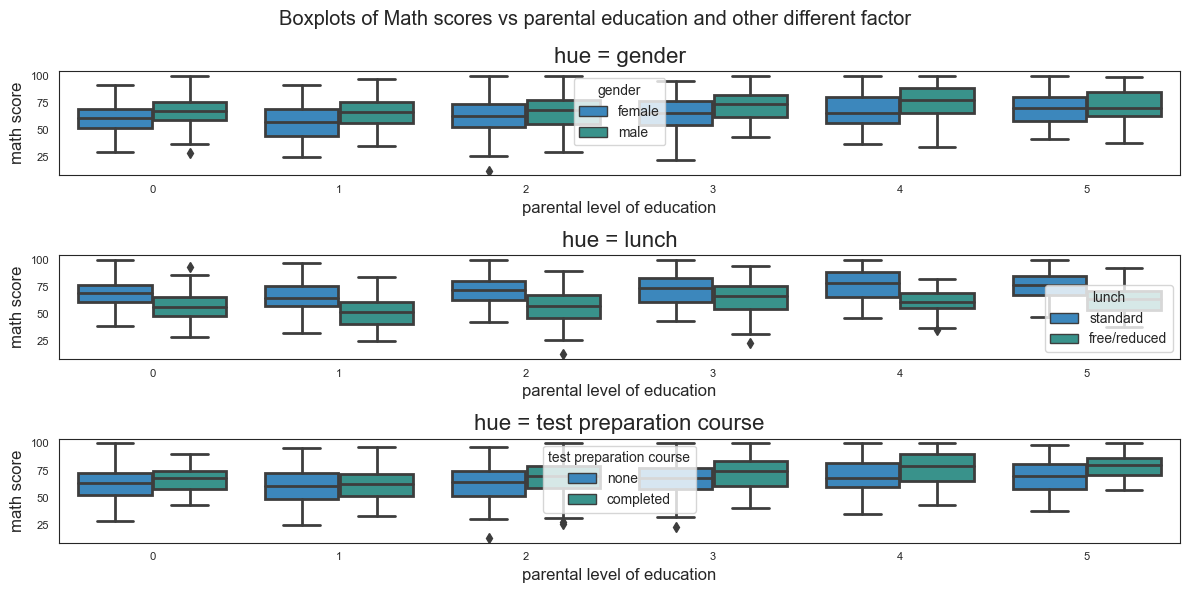

In [31]:
fig, axs = plt.subplots(nrows=3)

i=0
fig.suptitle('Boxplots of Math scores vs parental education and other different factor' , fontsize="x-large")
fig.set_in_layout
for hue in list_hues:
    sns.boxplot(data=df, x="parental level of education", y="math score", hue=hue, ax=axs[i] ).set_title (f'hue = {hue}') 
    i+=1
fig.tight_layout()

Regarding the *math score*, next points were observed from the previous boxplots graphs:
  * Men scored slightly higher than women 
  * Students with free/reduced lunch scored slightly lower than standard's.
  * Students who did the preparation course scored slightly better than the ones who didn't. Curiously, difference increases as parental education level improve.

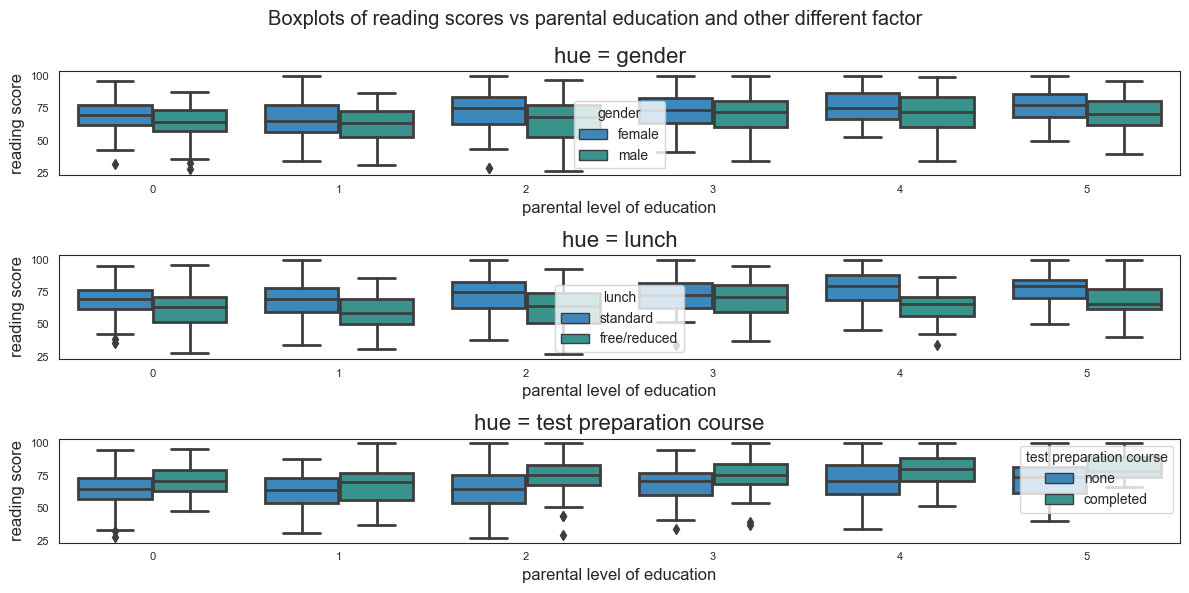

In [32]:
fig, axs = plt.subplots(nrows=3)

i=0
fig.suptitle('Boxplots of reading scores vs parental education and other different factor' , fontsize="x-large")
fig.set_in_layout
for hue in list_hues:
    sns.boxplot(data=df, x="parental level of education", y="reading score", hue=hue, ax=axs[i] ).set_title (f'hue = {hue}') 
    i+=1
fig.tight_layout()

Regarding the *reading score*, next points were observed from the previous boxplots graphs:
  * Men scored slightly higher than women 
  * Students with free/reduced lunch scored slightly lower than standard's.
  * Students who did the preparation course scored slightly better than the ones who didn't. 

Seen with global perspective, previous three graph showed a differential behaviour for male and females in math vs reading/writing scores. On the other side, all three graphs agree that students who partially or totaly got aids for lunch and didn't do the test preparation course have higher provabilities of lower scoring.

Regarding correlation between parenteral level of education and the three different scoring tests, it is difficult to check. Let's visualize scoring vs parental level of education without additional differentiation:

<AxesSubplot:xlabel='parental level of education', ylabel='writing score'>

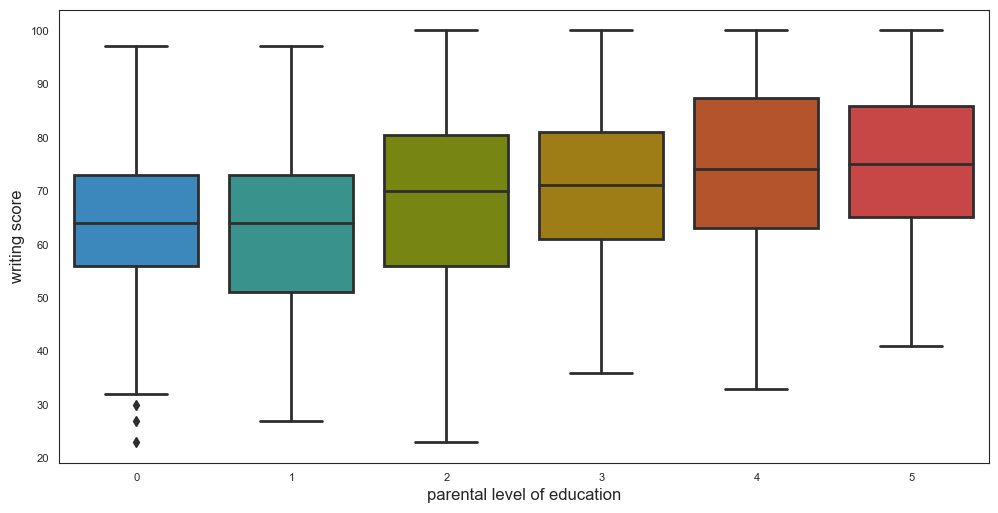

In [33]:
sns.boxplot(data=df, x="parental level of education", y="writing score") #hue="time",  style="time"

<AxesSubplot:xlabel='parental level of education', ylabel='reading score'>

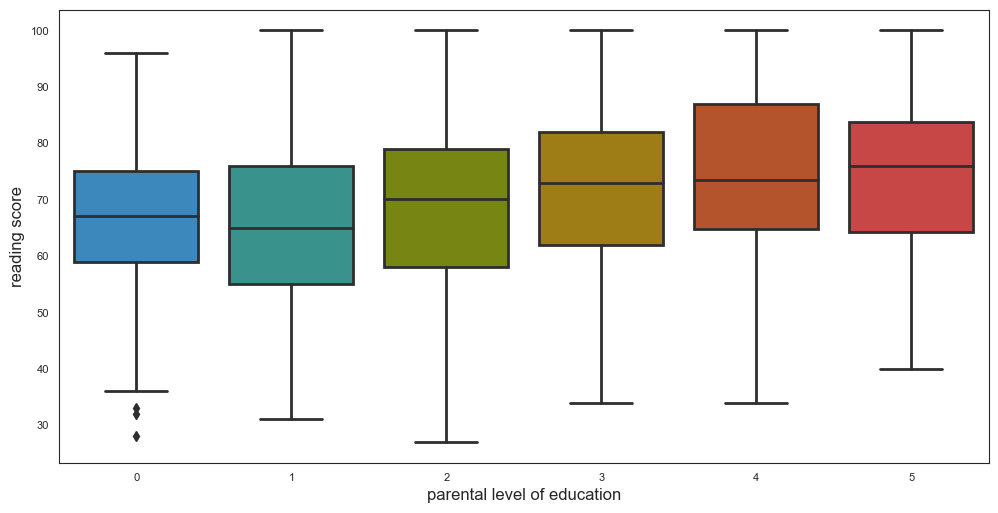

In [34]:
sns.boxplot(data=df, x="parental level of education", y="reading score") 

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

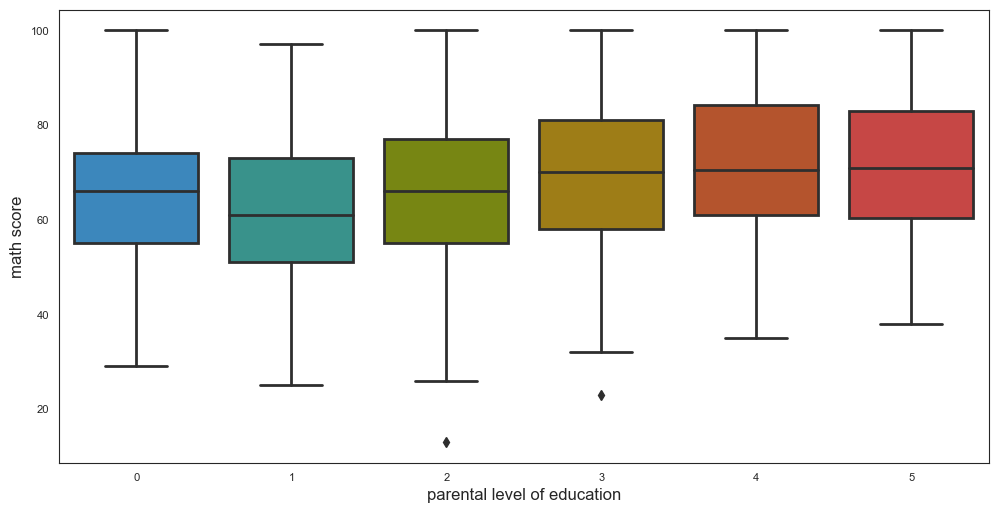

In [35]:
sns.boxplot(data=df, x="parental level of education", y="math score") 

Although, there is low linear correlation, in the writing looks like some correlation between parental level of education and writing score. 

Let's do a more segmented study and proceed to split the dataframe in 8 different dataframes (wrapped in a dictionary = dict_df) according to its classification on 3 binary variables:
  * Gender: male / female
  * Lunch: standard / reduced or free
  * Test preparation course: none / completed

The correlation between variables is going to be plotted for each dataframe with a heatmap plot and correlation values.

gender: male --- lunch : standard --- test preparation course : none


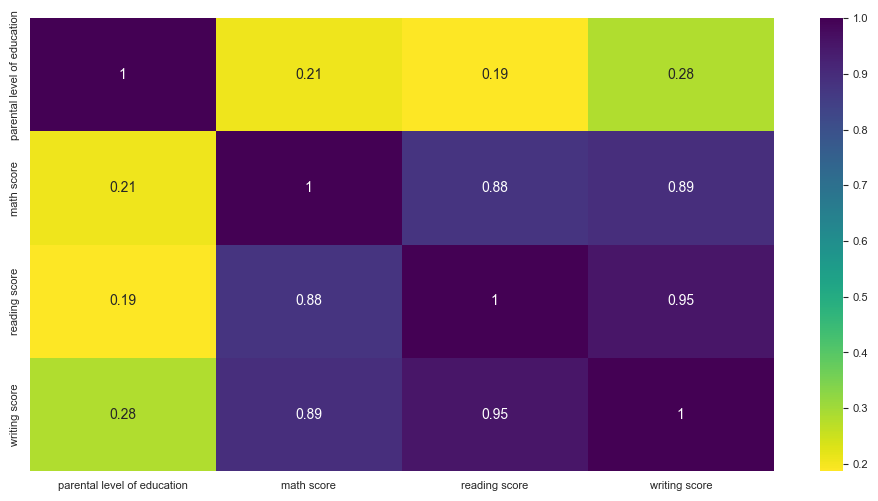

gender: male --- lunch : standard --- test preparation course : completed


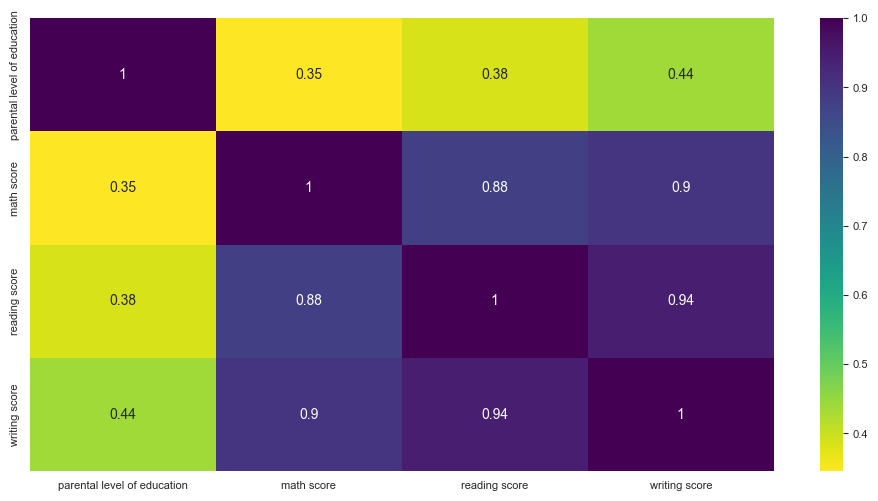

gender: male --- lunch : free/reduced --- test preparation course : none


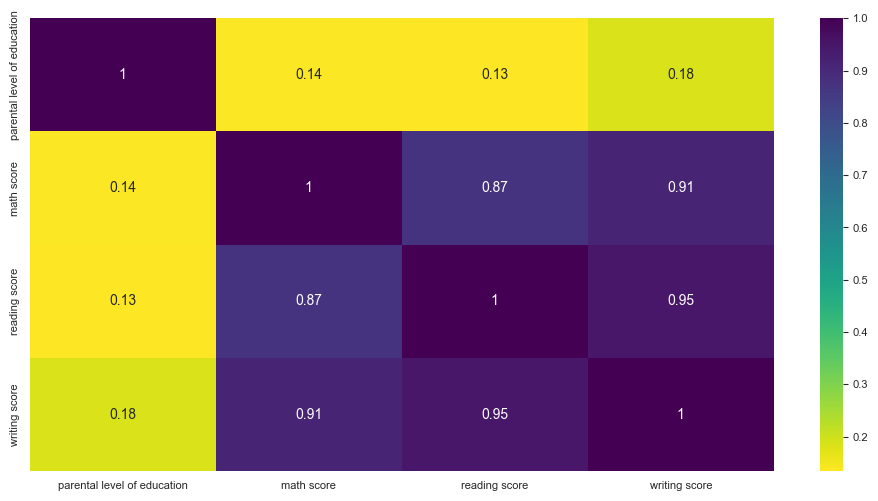

gender: male --- lunch : free/reduced --- test preparation course : completed


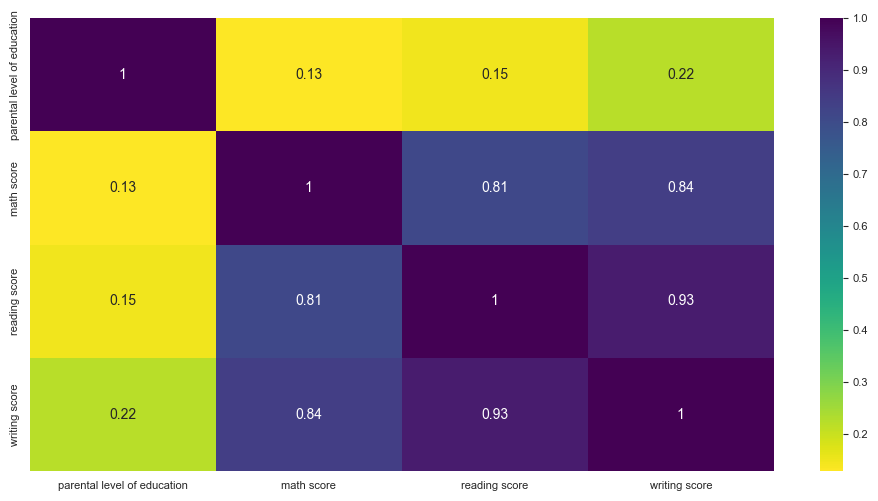

gender: female --- lunch : standard --- test preparation course : none


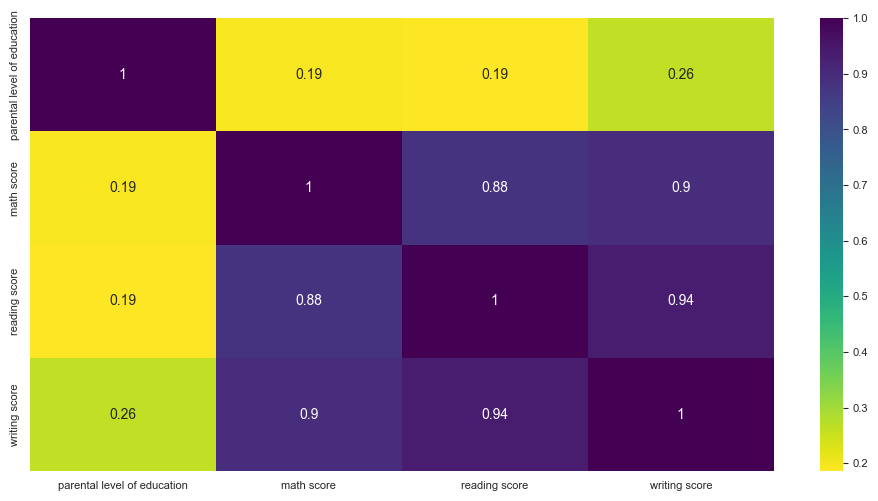

gender: female --- lunch : standard --- test preparation course : completed


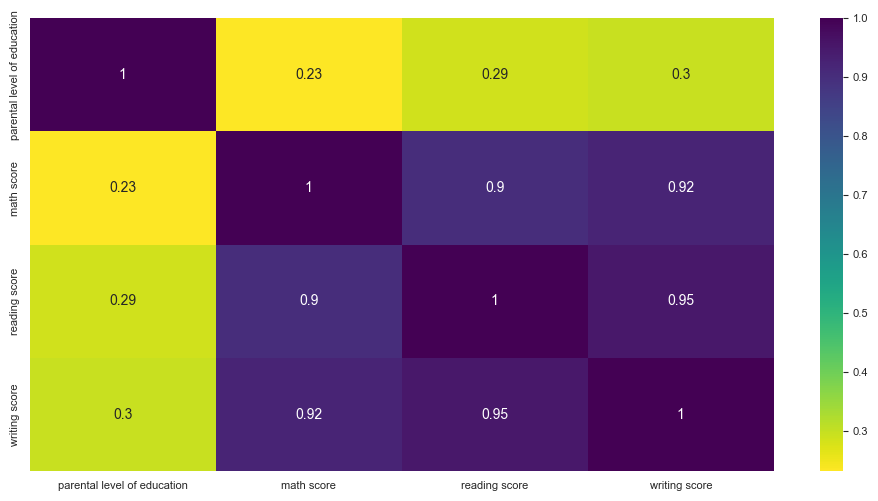

gender: female --- lunch : free/reduced --- test preparation course : none


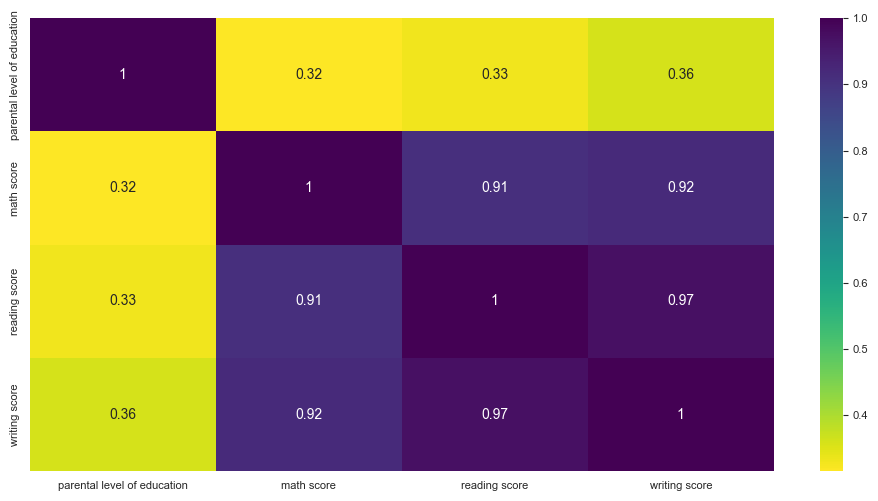

gender: female --- lunch : free/reduced --- test preparation course : completed


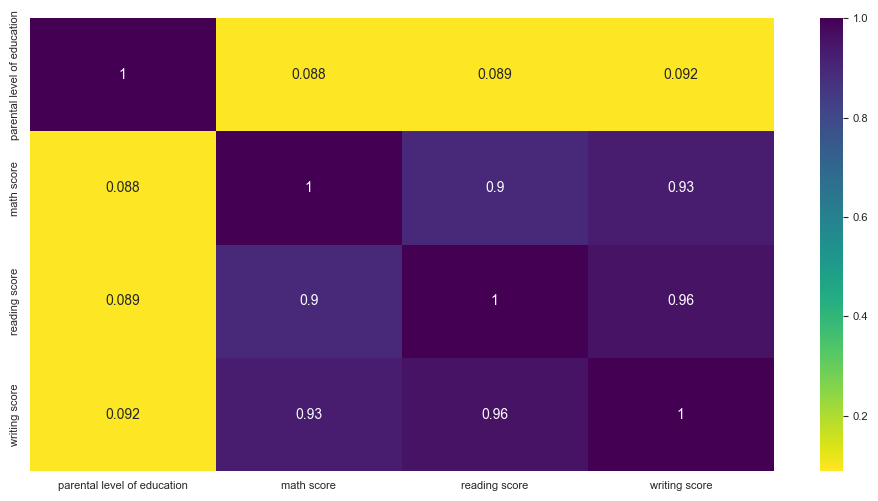

In [36]:
dict_df = {}
label_dfs, label_ratio =[], []
for gender in ['male','female']:
    dict_df[gender]={}

    for lunch in ['standard', 'free/reduced']:
        dict_df[gender][lunch]={}
        
        for test_preparation_course in ['none', 'completed']:
            label_dfs.append (gender +' --- '+lunch+' --- '+  test_preparation_course)
            dict_df[gender][lunch][test_preparation_course] = df[(df.gender==gender)& (df.lunch==lunch) & (df['test preparation course']==test_preparation_course)][['parental level of education', 'math score', 'reading score', 'writing score' ]]
            label_ratio.append (len (dict_df[gender][lunch][test_preparation_course] )/len(df))
            print (f'gender: {gender} --- lunch : {lunch} --- test preparation course : {test_preparation_course}')
            sns.heatmap(dict_df[gender][ lunch][test_preparation_course].corr(), cmap = 'viridis_r', annot=True)
            plt.show()

Let's compare with the correlation heatmap plot for the whole initial dataframe:

<AxesSubplot:>

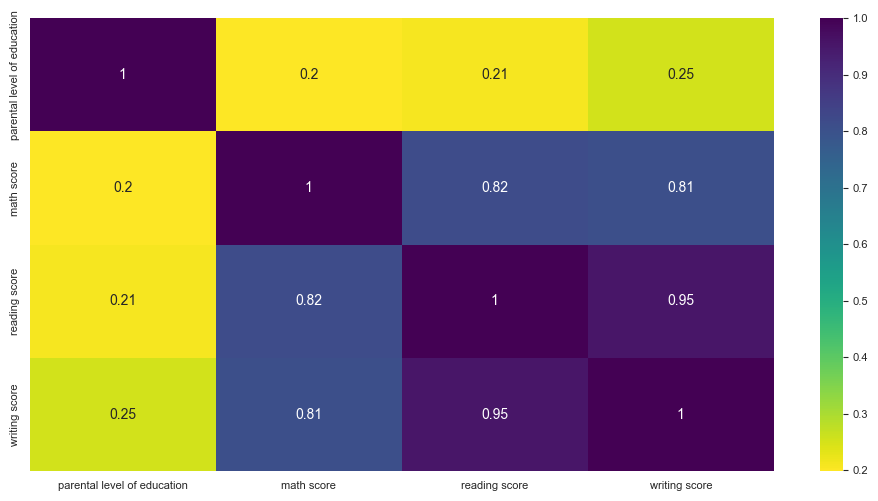

In [37]:
sns.heatmap(df[['parental level of education', 'math score','reading score', 'writing score',]].corr(), cmap = 'viridis_r', annot=True)

Correlation between scoring tests is very high, and t is higher for the segmented dataframes.  As correlation between writing ans reading scores is so high and correlation with labels is higher for writing score, **reading score will be dimissed when screening and developing a classification model to avoid noise to be added**. 

On the other hand, let's check relative population of each dataframe: 

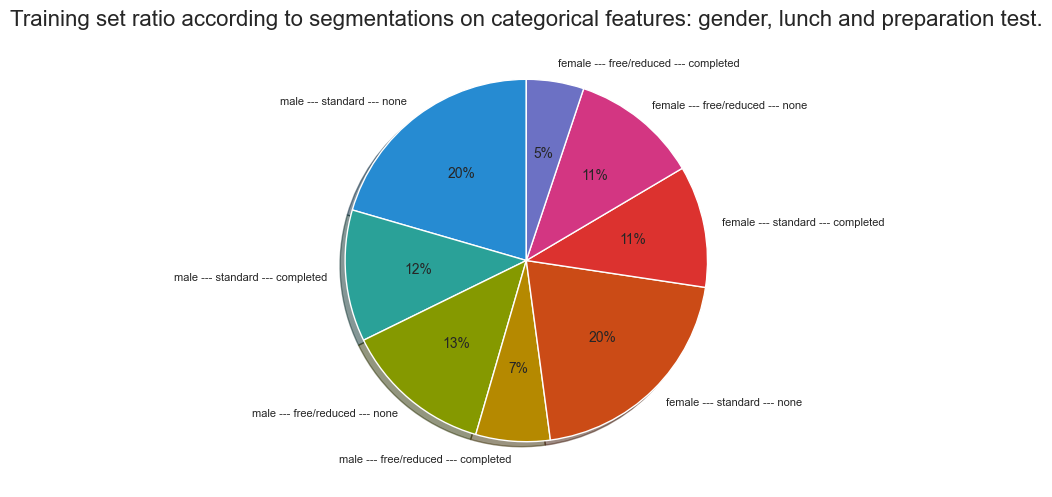

In [38]:
plt.pie( x= label_ratio, labels = label_dfs,  autopct='%.0f%%', shadow=True, startangle=90)
plt.title('Training set ratio according to segmentations on categorical features: gender, lunch and preparation test.')
plt.show()

gender: male --- lunch : standard --- test preparation course : none
Average : 1.9024390243902438


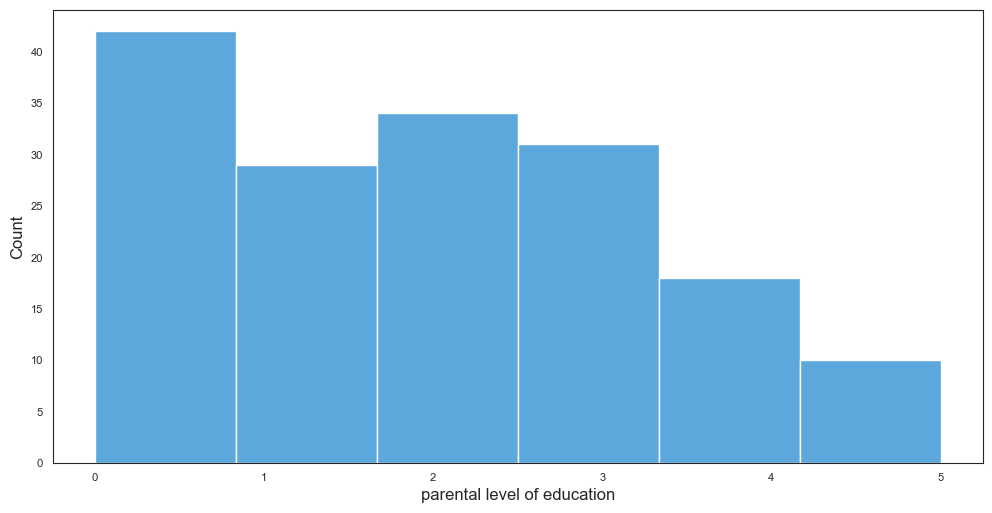

gender: male --- lunch : standard --- test preparation course : completed
Average : 2.202127659574468


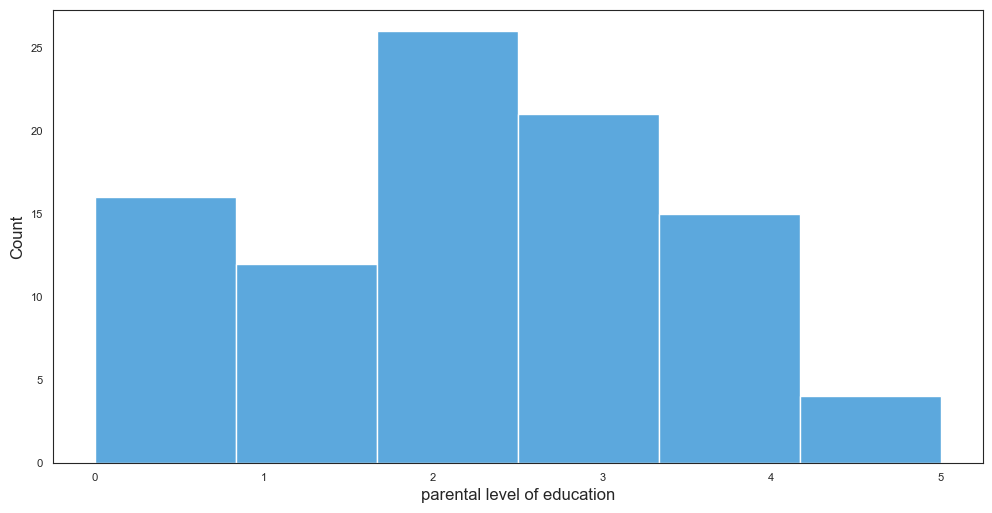

gender: male --- lunch : free/reduced --- test preparation course : none
Average : 2.1037735849056602


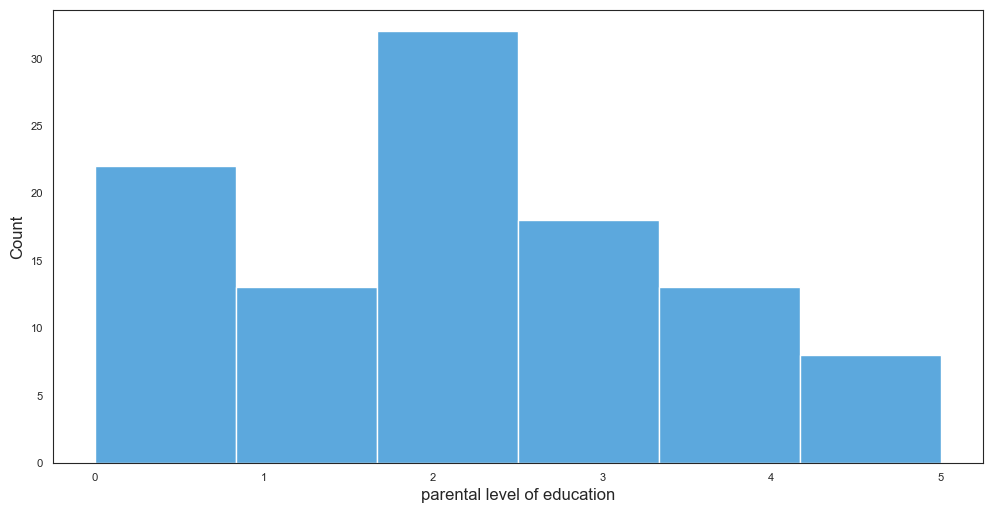

gender: male --- lunch : free/reduced --- test preparation course : completed
Average : 2.056603773584906


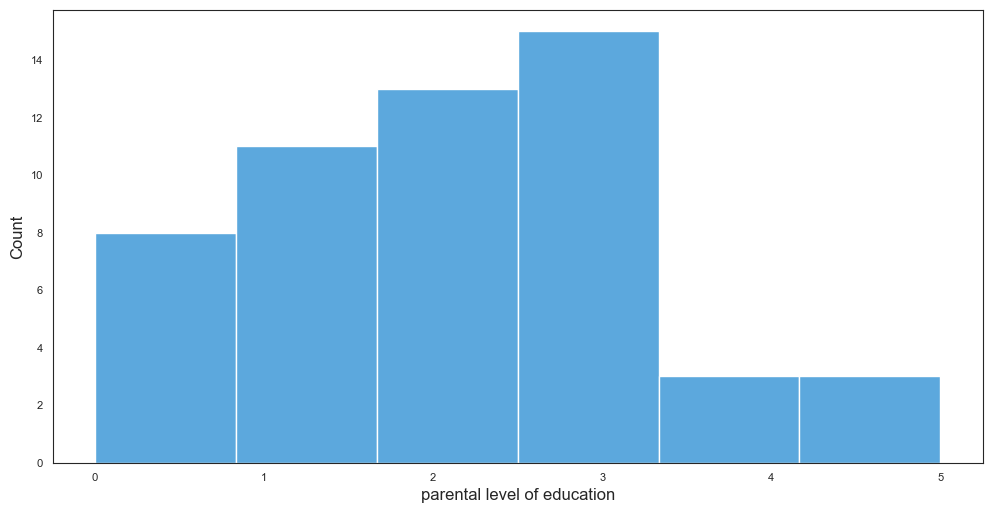

gender: female --- lunch : standard --- test preparation course : none
Average : 2.0365853658536586


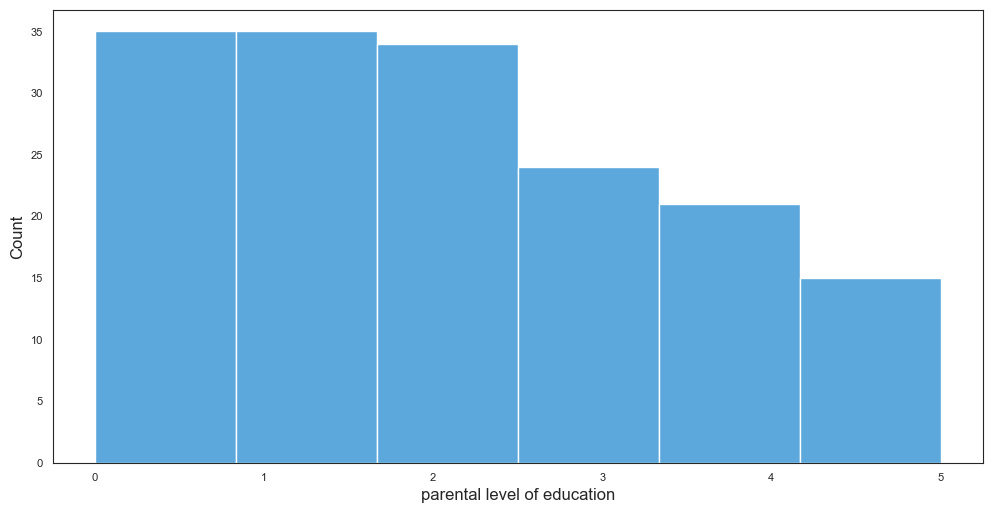

gender: female --- lunch : standard --- test preparation course : completed
Average : 2.1379310344827585


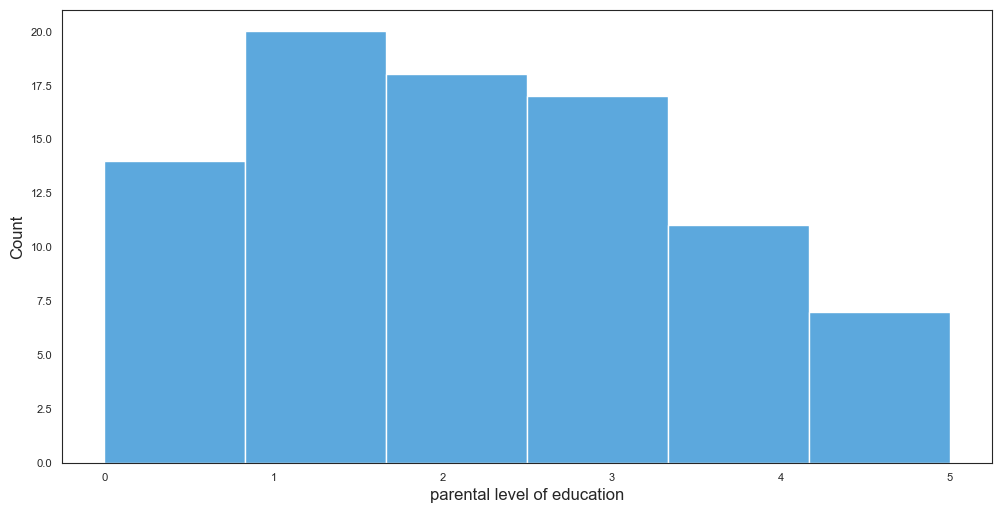

gender: female --- lunch : free/reduced --- test preparation course : none
Average : 2.043956043956044


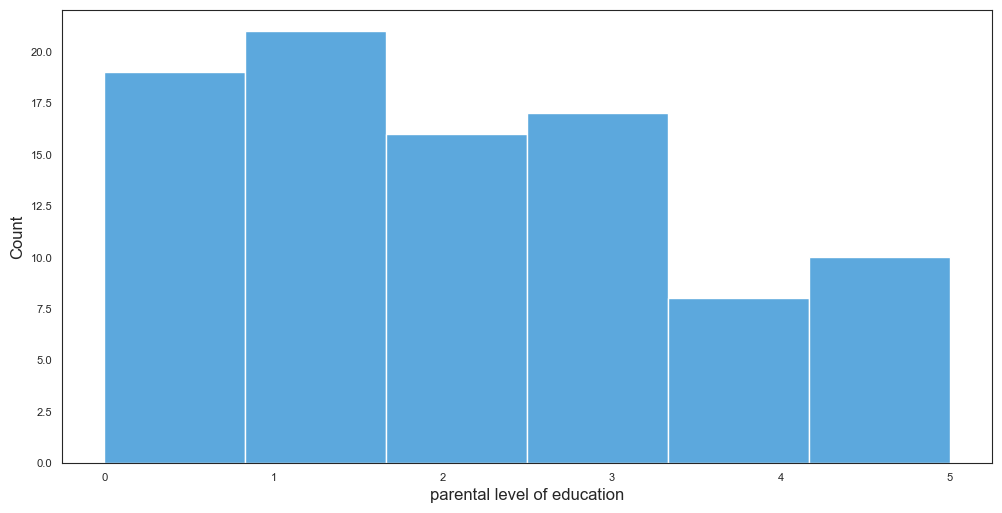

gender: female --- lunch : free/reduced --- test preparation course : completed
Average : 1.7317073170731707


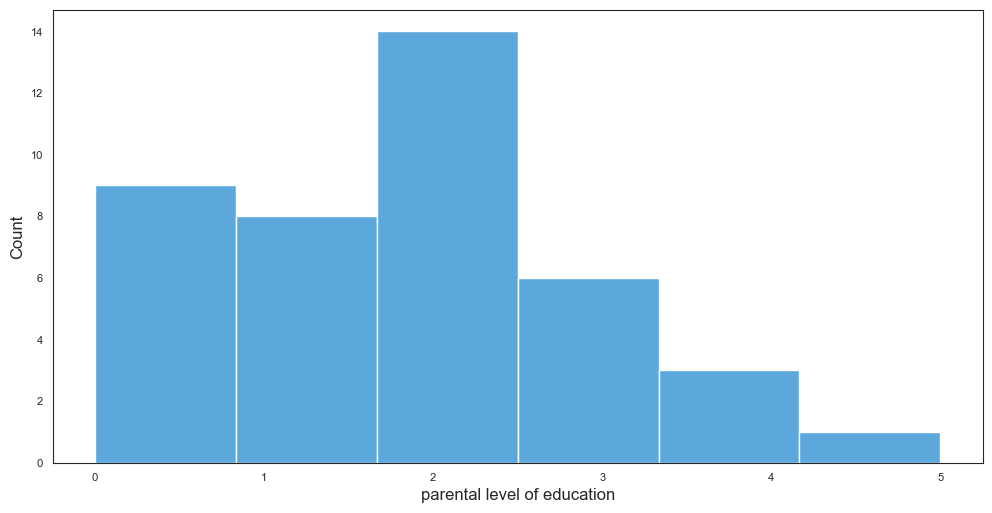

In [39]:
conditions=[]
averages=[]

for gender in ['male','female']:
    for lunch in ['standard', 'free/reduced']:
        for test_preparation_course in ['none', 'completed']:
            print (f'gender: {gender} --- lunch : {lunch} --- test preparation course : {test_preparation_course}')
            df_unique = dict_df[gender][lunch][test_preparation_course]['parental level of education']
            print (f'Average : {df_unique.sum()/len (df_unique)}')
            conditions.append(gender+'_'+lunch+ '_' + test_preparation_course )
            averages.append(df_unique.sum()/len (df_unique))
            sns.histplot (data =df_unique, bins=6)
            plt.show()
average_df =pd.DataFrame ({'Types': conditions, 'Averages': averages})

In [40]:
average_df.sort_values('Averages')

Types  Averages
7  female_free/reduced_completed  1.731707
0             male_standard_none  1.902439
4           female_standard_none  2.036585
6       female_free/reduced_none  2.043956
3    male_free/reduced_completed  2.056604
2         male_free/reduced_none  2.103774
5      female_standard_completed  2.137931
1        male_standard_completed  2.202128

In [41]:
print (f"Global average on parental level of education: {df[ 'parental level of education'].sum()/df[ 'parental level of education'].count()}") 

Global average on parental level of education: 2.035


Regarding different conditions of students, there is some points to higlight:
* Female students who has reduced or free lunch conditions and completed the courses have parents with a lower level of education. This don't happen for males. 

Now, let's do some feature changes to check later its influence in the model search.

In [42]:
def df_dummies (df):
    new_df_with_dum = pd.get_dummies (acad_Yield_train,
                columns= ['gender',  
                'lunch',
                'test preparation course' ] 
                )
    for i in ['gender_male', 'lunch_standard', 'test preparation course_none']:
        new_df_with_dum.drop(i, axis=1, inplace=True)
    return new_df_with_dum

def avg_num_colmns (df):
    new_df= df.copy()
    new_df['average_score'] = (new_df['math score'] + new_df['reading score'] + new_df['writing score'])/3
    new_df.drop(['math score', 'reading score','writing score'], axis= 1, inplace = True)
    return new_df

def max_num_colmns (df):
    new_df= df.copy()
    new_df['max_score'] = [max (x) for x in zip(new_df['math score'] , new_df['reading score'] , new_df['writing score'])]
    new_df.drop(['math score', 'reading score','writing score'], axis= 1, inplace = True)
    return new_df


In [43]:

   def min_num_colmns (df):
        new_df= df.copy()
        new_df['min_score'] = [min (x) for x in zip(new_df['math score'] , new_df['reading score'] , new_df['writing score'])]
        new_df.drop(['math score', 'reading score','writing score'], axis= 1, inplace = True)
        return new_df 

In [44]:
acad_Yield_train_dum =  df_dummies(acad_Yield_train)


In [45]:
acad_Yield_train_dum.head(5)

parental level of education  math score  reading score  writing score  \
764                            1          62             76             67   
866                            4          79             57             58   
208                            2          77             86             84   
337                            0          45             46             49   
323                            3          82             83             85   

     gender_female  lunch_free/reduced  test preparation course_completed  
764              1                   0                                  0  
866              0                   0                                  0  
208              1                   0                                  0  
337              1                   1                                  0  
323              0                   0                                  1

In [46]:
acad_Yield_train_dum_max = max_num_colmns(acad_Yield_train_dum)
acad_Yield_train_dum_max

parental level of education  gender_female  lunch_free/reduced  \
764                            1              1                   0   
866                            4              0                   0   
208                            2              1                   0   
337                            0              1                   1   
323                            3              0                   0   
..                           ...            ...                 ...   
272                            0              0                   0   
853                            2              0                   0   
894                            3              0                   0   
179                            0              0                   0   
182                            4              1                   0   

     test preparation course_completed  max_score  
764                                  0         76  
866                                  0         79  
208                                  0         86  
337                                  0         49  
323                                  1         85  
..                                 ...        ...  
272                                  1         74  
853                                  1         72  
894                                  0         86  
179                                  1         89  
182                                  0         95  

[800 rows x 5 columns]

In [47]:
acad_Yield_train_dum_avg = avg_num_colmns(acad_Yield_train_dum)
acad_Yield_train_dum_avg

parental level of education  gender_female  lunch_free/reduced  \
764                            1              1                   0   
866                            4              0                   0   
208                            2              1                   0   
337                            0              1                   1   
323                            3              0                   0   
..                           ...            ...                 ...   
272                            0              0                   0   
853                            2              0                   0   
894                            3              0                   0   
179                            0              0                   0   
182                            4              1                   0   

     test preparation course_completed  average_score  
764                                  0      68.333333  
866                                  0      64.666667  
208                                  0      82.333333  
337                                  0      46.666667  
323                                  1      83.333333  
..                                 ...            ...  
272                                  1      70.000000  
853                                  1      72.000000  
894                                  0      80.333333  
179                                  1      87.333333  
182                                  0      89.333333  

[800 rows x 5 columns]

In [48]:
acad_Yield_train_dum.columns

Index(['parental level of education', 'math score', 'reading score',
       'writing score', 'gender_female', 'lunch_free/reduced',
       'test preparation course_completed'],
      dtype='object')

In [49]:
acad_Yield_train_math=acad_Yield_train.copy()
acad_Yield_train_math.drop(['reading score', 'writing score'], axis= 1, inplace= True)
acad_Yield_train_math

gender  parental level of education         lunch  \
764  female                            1      standard   
866    male                            4      standard   
208  female                            2      standard   
337  female                            0  free/reduced   
323    male                            3      standard   
..      ...                          ...           ...   
272    male                            0      standard   
853    male                            2      standard   
894    male                            3      standard   
179    male                            0      standard   
182  female                            4      standard   

    test preparation course  math score  
764                    none          62  
866                    none          79  
208                    none          77  
337                    none          45  
323               completed          82  
..                      ...         ...  
272               completed          74  
853               completed          72  
894                    none          86  
179               completed          89  
182                    none          84  

[800 rows x 5 columns]

In [50]:
acad_Yield_train_dum.head(5)

parental level of education  math score  reading score  writing score  \
764                            1          62             76             67   
866                            4          79             57             58   
208                            2          77             86             84   
337                            0          45             46             49   
323                            3          82             83             85   

     gender_female  lunch_free/reduced  test preparation course_completed  
764              1                   0                                  0  
866              0                   0                                  0  
208              1                   0                                  0  
337              1                   1                                  0  
323              0                   0                                  1

In [51]:
X = acad_Yield_train_dum.drop('parental level of education', axis = 1).values
y = acad_Yield_train_dum['parental level of education']

numerical_cols=['math score', 
                'reading score',       
                'writing score', 
                'gender_female', 
                'lunch_free/reduced',       
                'test preparation course_completed'
                ]


In [52]:
scaler = preprocessing.StandardScaler()
acad_Yield_train_std = scaler.fit_transform(X)
acad_Yield_train_std = pd.DataFrame(acad_Yield_train_std, columns =numerical_cols)

In [53]:
acad_Yield_train_std

math score  reading score  writing score  gender_female  \
0     -0.291354       0.463485      -0.053009       1.043443   
1      0.791570      -0.819284      -0.625215      -0.958366   
2      0.664167       1.138626       1.027826       1.043443   
3     -1.374279      -1.561940      -1.197421       1.043443   
4      0.982674       0.936084       1.091404      -0.958366   
..          ...            ...            ...            ...   
795    0.473063       0.125914      -0.180166      -0.958366   
796    0.345660       0.193428       0.264884      -0.958366   
797    1.237480       0.530999       0.646355      -0.958366   
798    1.428584       1.206140       1.154983      -0.958366   
799    1.110077       1.746253       1.345718       1.043443   

     lunch_free/reduced  test preparation course_completed  
0             -0.756115                          -0.723747  
1             -0.756115                          -0.723747  
2             -0.756115                          -0.723747  
3              1.322551                          -0.723747  
4             -0.756115                           1.381699  
..                  ...                                ...  
795           -0.756115                           1.381699  
796           -0.756115                           1.381699  
797           -0.756115                          -0.723747  
798           -0.756115                           1.381699  
799           -0.756115                          -0.723747  

[800 rows x 6 columns]

# 3. Screen models

Fist of all, let's study the dataframe splitted according to previous point. Initially 8 different dataframes should been studied. Unfortynatelly, there is too few data on the two minoritary dataframes and should be merged into one. Then, there will be 7 different dataframes to be studied:

## 3.1. Train splitted dataframes

In [ ]:
best_models = []
types = []
for gender in ['male','female']:
    for lunch in ['standard', 'free/reduced']:
        for test_preparation_course in ['none', 'completed']:
            print (f'gender: {gender} --- lunch : {lunch} --- test preparation course : {test_preparation_course}')
            df_unique = dict_df[gender][lunch][test_preparation_course][['parental level of education',  'writing score']]
            name = 'best_model__' + gender +'__' + lunch +'__' + test_preparation_course
            setup(df_unique,
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
            best_models.append (compare_models())
            types.append(name)
df_best_models = pd.DataFrame  ({'type': types, 'best models': best_models})

In [54]:
gender_ls, lunch_ls, test_preparation_course_ls, features_ls, model, accuracy, f1=[],[],[],[],[],[],[]

### gender: male --- lunch : standard --- test preparation course : completed

In [55]:
gender_ls.append(0)
lunch_ls.append(0)
test_preparation_course_ls.append(1)

In [56]:
setup(dict_df['male']['standard']['completed'][['parental level of education','writing score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_male_std_compltd_1=compare_models()

In [96]:
setup(dict_df['male']['standard']['completed'][['parental level of education','writing score','math score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_male_std_compltd_2=compare_models()

In [58]:
features_ls.append(2)
model.append('Extra Trees Classifier')
accuracy.append(0.4167)
f1.append(0.3721)

The best model is Extra Trees Classifier using math and writing scores. Let's check the labels ratio to check minimum accuracy that should be reached if all labels were assigned to the majoritary class:

In [99]:
setup(dict_df['male']['standard']['completed'][['parental level of education','writing score','math score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
final_male_std_compltd_2 = finalize_model('et')

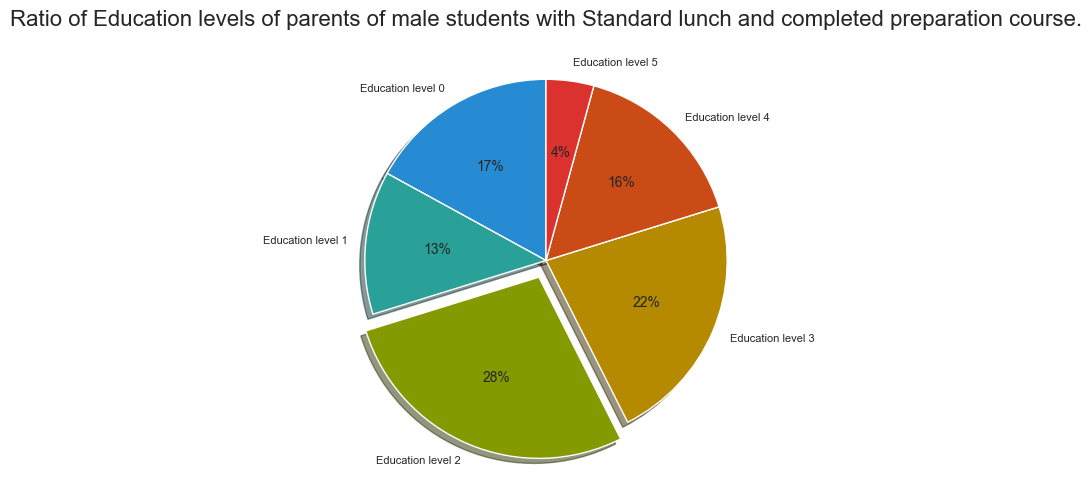

In [59]:
plt.pie(data=dict_df['male']['standard']['completed'].groupby('parental level of education').count(), x= 'writing score', labels = labels, explode=(0,0,0.1,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)
plt.title('Ratio of Education levels of parents of male students with Standard lunch and completed preparation course.')
plt.show()

### gender: female --- lunch : standard --- test preparation course : completed

In [60]:
gender_ls.append(1)
lunch_ls.append(0)
test_preparation_course_ls.append(1)

In [61]:
setup(dict_df['female']['standard']['completed'][['parental level of education','writing score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_female_std_compltd_1=compare_models()

In [62]:
setup(dict_df['female']['standard']['completed'][['parental level of education','writing score','math score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_female_std_compltd_2=compare_models(n_select=3)

In [100]:
setup(dict_df['female']['standard']['completed'][['parental level of education','writing score','math score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )

final_female_std_compltd_2 = finalize_model('lda')

In [64]:
features_ls.append(2)
model.append('Linear Discriminant Analysis')
accuracy.append(0.3000)
f1.append(0.2206)

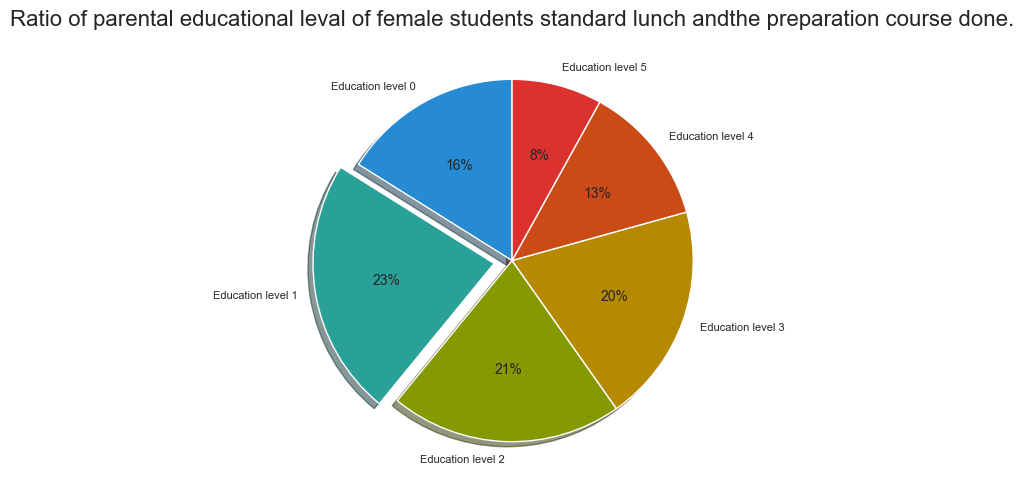

In [65]:
plt.pie(data=dict_df['female']['standard']['completed'].groupby('parental level of education').count(), x= 'writing score', labels = labels, explode=(0,0.1,0,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)
plt.title('Ratio of parental educational leval of female students standard lunch andthe preparation course done.')
plt.show()

### gender: male + female --- lunch : free/reduced --- test preparation course : completed

In [66]:
gender_ls.append(2)
lunch_ls.append(1)
test_preparation_course_ls.append(1)

In [67]:
df_concatenated =pd.concat([dict_df['male']['free/reduced']['completed'], dict_df['female']['free/reduced']['completed']])

In [68]:
setup(df_concatenated[['parental level of education','writing score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_male_fr_compltd_1=compare_models(n_select=4)

In [69]:
best_model_male_fr_compltd_1 = best_model_male_fr_compltd_1 [3]

In [70]:
setup(df_concatenated[['parental level of education','writing score','math score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_male_fr_compltd_2=compare_models(n_select=2)

In [71]:
best_model_male_fr_compltd_2 = best_model_male_fr_compltd_2 [1]

In [72]:
features_ls.append(2)
model.append('Light Gradient Boosting Machine')
accuracy.append(0.3786)
f1.append(0.3163)

In [101]:
setup(df_concatenated[['parental level of education','writing score','math score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
final_male_fr_compltd_2 = finalize_model('lightgbm')

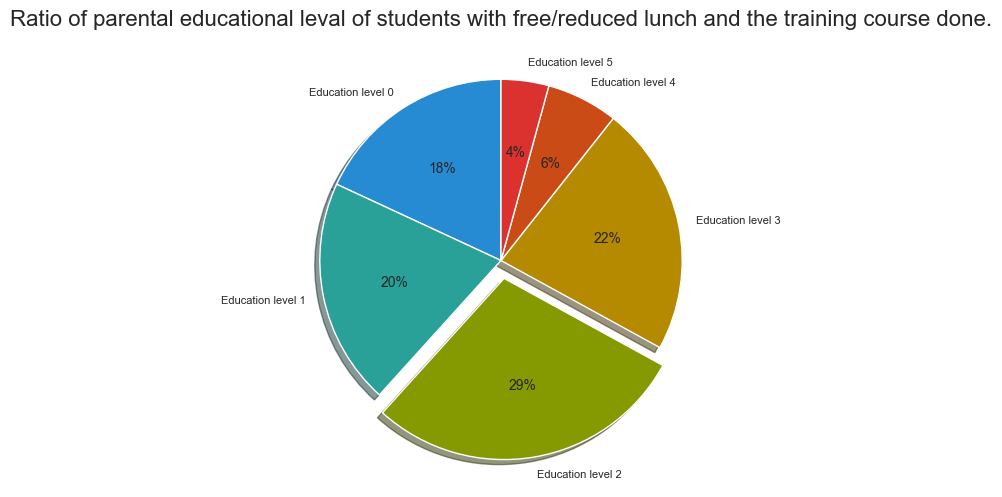

In [73]:
plt.pie(data=df_concatenated.groupby('parental level of education').count(), x= 'writing score', labels = labels, explode=(0,0,0.1,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)
plt.title('Ratio of parental educational leval of students with free/reduced lunch and the training course done.')
plt.show()

### gender: male --- lunch : free/reduced --- test preparation course : none

In [74]:
gender_ls.append(0)
lunch_ls.append(1)
test_preparation_course_ls.append(0)

In [75]:
setup(dict_df['male']['free/reduced']['none'][['parental level of education', 'writing score' ]],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_male_fr_none_1=compare_models()

In [76]:
setup(dict_df['male']['free/reduced']['none'][['parental level of education', 'writing score', 'math score' ]],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_male_fr_none_2=compare_models()

In [77]:
features_ls.append(1)
model.append('Naive Bayes')
accuracy.append(0.3375)
f1.append(0.1814)

In [102]:
setup(dict_df['male']['free/reduced']['none'][['parental level of education', 'writing score' ]],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
final_male_fr_none_1 = finalize_model('nb')

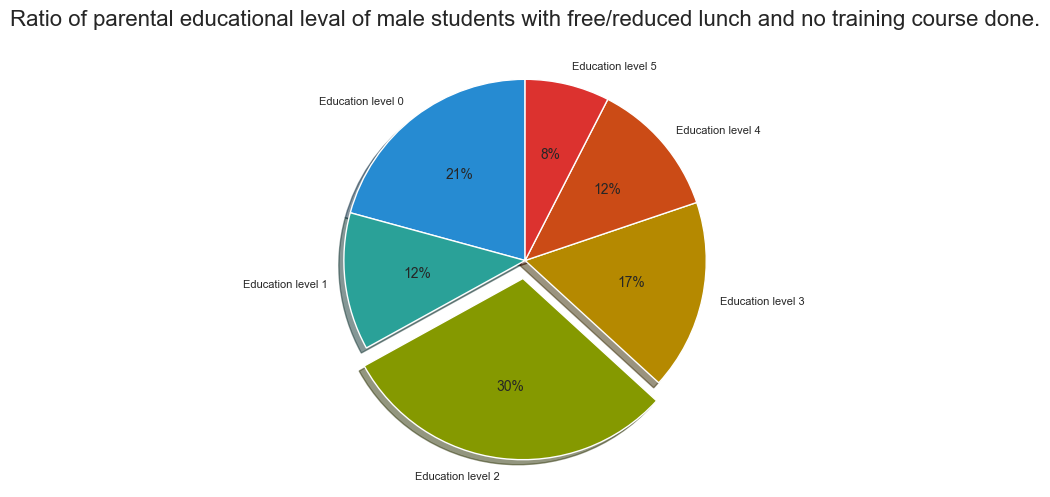

In [78]:
plt.pie(data=dict_df['male']['free/reduced']['none'].groupby('parental level of education').count(), x= 'writing score', labels = labels, explode=(0,0,0.1,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)
plt.title('Ratio of parental educational leval of male students with free/reduced lunch and no training course done.')
plt.show()

### gender: female --- lunch : free/reduced --- test preparation course : none

In [79]:
gender_ls.append(1)
lunch_ls.append(1)
test_preparation_course_ls.append(0)

In [80]:
setup(dict_df['female']['free/reduced']['none'][['parental level of education', 'writing score' ]],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_female_fr_none_1=compare_models(n_select=2)

In [81]:
best_model_female_fr_none_1 = best_model_female_fr_none_1 [1]

In [82]:
setup(dict_df['female']['free/reduced']['none'][['parental level of education', 'writing score','math score' ]],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_female_fr_none_2=compare_models()

In [83]:
features_ls.append(1)
model.append('Extreme Gradient Boosting')
accuracy.append(0.3048)
f1.append(0.2588)

In [103]:
setup(dict_df['female']['free/reduced']['none'][['parental level of education', 'writing score' ]],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
final_female_fr_none_1= finalize_model('xgboost')

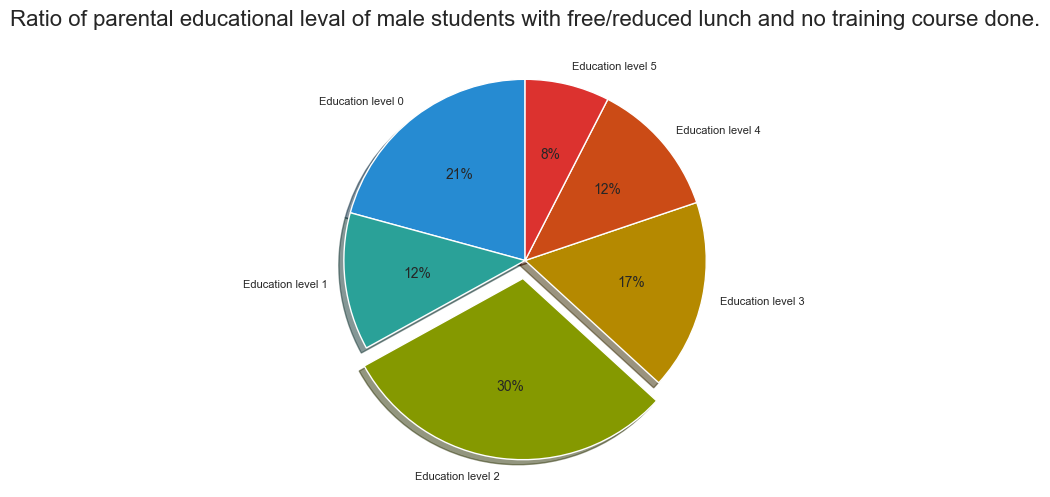

In [84]:
plt.pie(data=dict_df['male']['free/reduced']['none'].groupby('parental level of education').count(), x= 'writing score', labels = labels, explode=(0,0,0.1,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)
plt.title('Ratio of parental educational leval of male students with free/reduced lunch and no training course done.')
plt.show()

### gender: male --- lunch : standard --- test preparation course : none

In [85]:
gender_ls.append(0)
lunch_ls.append(0)
test_preparation_course_ls.append(0)

In [86]:
setup(dict_df['male']['standard']['none'][['parental level of education', 'writing score' ]],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_male_std_none_1=compare_models()

In [87]:
setup(dict_df['male']['standard']['none'][['parental level of education', 'writing score','math score' ]],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_male_std_none_2=compare_models()

In [88]:
features_ls.append(1)
model.append('Extreme Gradient Boosting')
accuracy.append(0.2985)
f1.append(0.2727)

In [104]:
setup(dict_df['male']['standard']['none'][['parental level of education', 'writing score' ]],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
final_male_std_none_1= finalize_model('xgboost')

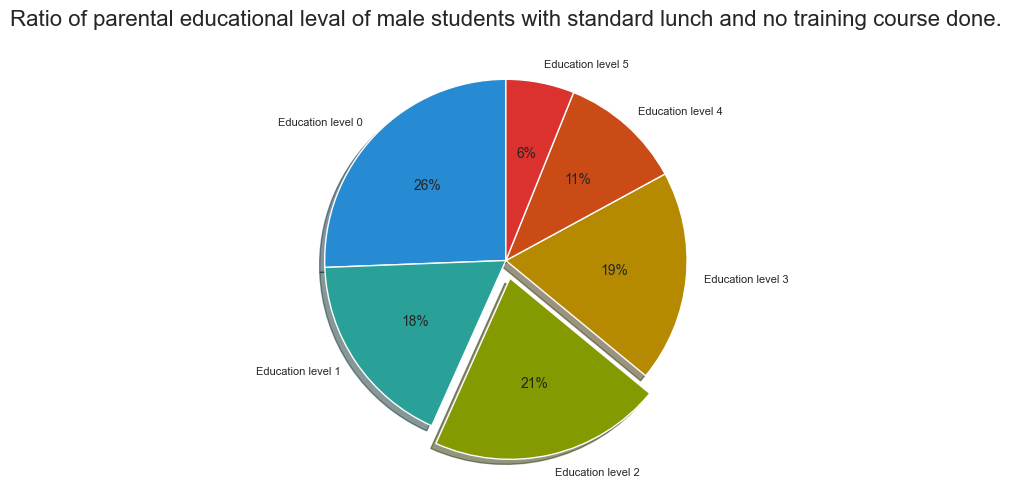

In [89]:
plt.pie(data=dict_df['male']['standard']['none'].groupby('parental level of education').count(), x= 'writing score', labels = labels, explode=(0,0,0.1,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)
plt.title('Ratio of parental educational leval of male students with standard lunch and no training course done.')
plt.show()

### gender: female --- lunch : standard --- test preparation course : none

In [90]:
gender_ls.append(1)
lunch_ls.append(0)
test_preparation_course_ls.append(0)

In [91]:
setup(dict_df['female']['standard']['none'][['parental level of education','writing score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_female_std_none_1=compare_models()

In [92]:
setup(dict_df['female']['standard']['none'][['parental level of education','writing score', 'math score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_female_std_none_2=compare_models()

In [93]:
features_ls.append(2)
model.append('Extra Trees Classifier')
accuracy.append(0.2712)
f1.append(0.2386)

In [105]:
setup(dict_df['female']['standard']['none'][['parental level of education','writing score', 'math score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
final_female_std_none_2= finalize_model('et')

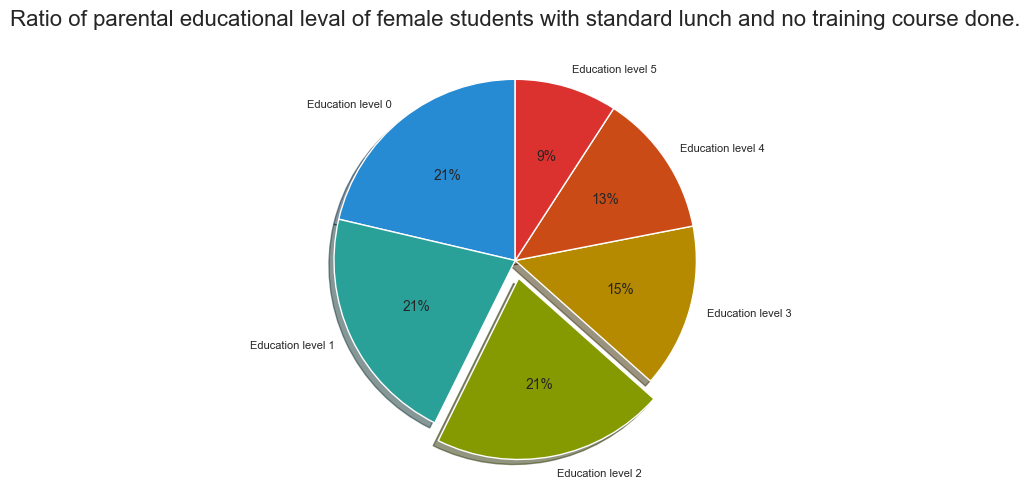

In [94]:
plt.pie(data=dict_df['female']['standard']['none'].groupby('parental level of education').count(), x= 'writing score', labels = labels, explode=(0,0,0.1,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)
plt.title('Ratio of parental educational leval of female students with standard lunch and no training course done.')
plt.show()

Data frame construction of best models and results:

In [95]:
print (f'{len(gender_ls)}   -   {len(features_ls)} ')
results_df = pd.DataFrame ({'lunch' : lunch_ls,
                            'test preparation': test_preparation_course_ls,
                            'gender': gender_ls,
                            'features':features_ls, 
                            'model': model, 
                            'accuracy':accuracy, 
                            'f1':f1 })
results_df

7   -   7 


lunch  test preparation  gender  features                            model  \
0      0                 1       0         2           Extra Trees Classifier   
1      0                 1       1         2     Linear Discriminant Analysis   
2      1                 1       2         2  Light Gradient Boosting Machine   
3      1                 0       0         1                      Naive Bayes   
4      1                 0       1         1        Extreme Gradient Boosting   
5      0                 0       0         1        Extreme Gradient Boosting   
6      0                 0       1         2           Extra Trees Classifier   

   accuracy      f1  
0    0.4167  0.3721  
1    0.3000  0.2206  
2    0.3786  0.3163  
3    0.3375  0.1814  
4    0.3048  0.2588  
5    0.2985  0.2727  
6    0.2712  0.2386

gender: 

    0: male / 1: female

lunch:

    0: standard / 1: free/reduced'

test preparation:

    0: none / 1: completed

features:

    1: writing score / 2: writing and math scores

## 3.2 Screening with Pycaret the whole dataframe feature modifications

With Pycaret, several models can be screened with few lines of code.

In [ ]:
setup(acad_Yield_train,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          silent = True        
    )
best_model_basic=compare_models() 

In [ ]:
acad_Yield_test

In [ ]:
setup(acad_Yield_train_dum_avg,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

In [ ]:
setup(acad_Yield_train_math,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

In [ ]:
acad_Yield_train_std['parental level of education'] = acad_Yield_train['parental level of education']

In [ ]:
setup(acad_Yield_train_std,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

In [ ]:
setup(acad_Yield_train_dum_max,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

Comparing between screening models with the whole dataframe or with the segmented dataframe, it is much better to perform segmentation before train any model. 

# 4. Model creation and tunning

In [ ]:
df.columns
setup (data = dict_df['female']['standard']['none'][['parental level of education', 'writing score']],
        target = 'parental level of education'
    )
model_std_none_f = create_model ('xgboost')


In [ ]:
dict_df['female']['standard']['none'][['parental level of education', 'writing score']]

In [ ]:
model_dict = {{'standard':{'none':{'male':model1, 'female': model2}, 'completed': {'male':model1, 'female': model2}}}, 'free/reduced':{'none':{'male':model1, 'female': model2}, 'completed': {'male':model1, 'female': model2} }}

In [ ]:
acad_Yield_test.iloc[1,:]

# 5. Predictions

In [ ]:
acad_Yield_test.iloc[0,:]['lunch']
Yield_test.iloc[i:i+1]

In [ ]:


predict_model(XXXXXX, acad_Yield_test.iloc[i:i+1][['writing score','math score']]).Label

In [112]:
setup(dict_df['male']['free/reduced']['none'][['parental level of education', 'writing score' ]],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
predict_model(best_model_male_fr_none_1, data = acad_Yield_test.iloc[0:1][['writing score']])#.Label

writing score  Label   Score
79             45      2  0.3946

In [ ]:
#SALVAR DICCIONARIO
my_dict = { 'Apple': 4, 'Banana': 2, 'Orange': 6, 'Grapes': 11}
np.save('file.npy', my_dict)

#CARGAR DICCIONARIO
new_dict = np.load('file.npy', allow_pickle='TRUE')
print(new_dict)


Save models to numpy files:

In [ ]:
np.save('best_model_male_std_none_1.npy', best_model_male_std_none_1)
np.save('best_model_female_std_none_2.npy', best_model_female_std_none_2)
np.save('best_model_male_std_compltd_2.npy', best_model_male_std_compltd_2)
np.save('best_model_female_std_compltd_2.npy', best_model_female_std_compltd_2)
np.save('best_model_male_fr_none_1.npy', best_model_male_fr_none_1)
np.save('best_model_female_fr_none_1.npy', best_model_female_fr_none_1)
np.save('best_model_male_fr_compltd_2.npy', best_model_male_fr_compltd_2)

In [113]:

prediction  = []
for i in  range(len (acad_Yield_test)):

    if acad_Yield_test.iloc[i,:]['lunch'] == 'standard':
        if acad_Yield_test.iloc[i,:]['test preparation course'] == 'none':
            if acad_Yield_test.iloc[i,:]['gender'] == 'male':
                setup(dict_df['male']['standard']['none'][['parental level of education', 'writing score' ]],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
                prediction.append ( predict_model(best_model_male_std_none_1, acad_Yield_test.iloc[i:i+1][['writing score']]).Label)
            else:
                setup(dict_df['female']['standard']['none'][['parental level of education','writing score', 'math score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
                prediction.append ( predict_model(best_model_female_std_none_2, acad_Yield_test.iloc[i:i+1][['writing score','math score']]).Label)
        else:
            if acad_Yield_test.iloc[i,:]['gender'] == 'male':
                setup(dict_df['male']['standard']['completed'][['parental level of education','writing score','math score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
                prediction.append ( predict_model(best_model_male_std_compltd_2, acad_Yield_test.iloc[i:i+1][['writing score','math score']]).Label)
            else:
                setup(dict_df['female']['standard']['completed'][['parental level of education','writing score','math score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )                
                prediction.append ( predict_model(best_model_female_std_compltd_2, acad_Yield_test.iloc[i:i+1][['writing score','math score']]).Label)
    else:
        if acad_Yield_test.iloc[i,:]['test preparation course'] == 'none':
            if acad_Yield_test.iloc[i,:]['gender'] == 'male':
                setup(dict_df['male']['free/reduced']['none'][['parental level of education', 'writing score' ]],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
                prediction.append ( predict_model(best_model_male_fr_none_1, acad_Yield_test.iloc[i:i+1][['writing score']]).Label)
            else:
                setup(dict_df['female']['free/reduced']['none'][['parental level of education', 'writing score' ]],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
                prediction.append ( predict_model(best_model_female_fr_none_1, acad_Yield_test.iloc[i:i+1][['writing score']]).Label)
        else:
            setup(df_concatenated[['parental level of education','writing score','math score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )            
            prediction.append ( predict_model(best_model_male_fr_compltd_2, acad_Yield_test.iloc[i:i+1][['writing score','math score']]).Label)
            

In [173]:
prediction[0].values[0]

0

In [176]:
prediction[0].index[0]

79

In [188]:
pred = pd.DataFrame( {'target': [x.values[0] for x in prediction]}) 
pred.index=[x.index[0] for x in prediction]
pred.to_json('predictions.json')

# 6. Results & Conclusions

The exploratory data analysis showed next insights:


# 7. References

# 8. Other

In [ ]:
# Saving in a text file all installed libraries in the environment used to run this project.
!pip freeze > requirements.txt 